In [5]:
import pandas as pd
import geopandas as gp
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import shapely
import math
import datetime as dt

In [6]:
import os
#had to add GDAL_DATA variable to system variables and set value to the folder of gdal in C:\Users\mishaun\AppData\Local\Continuum\anaconda3\Library\share\gdal on my work computer
'GDAL_DATA' in os.environ

False

In [7]:
#These 2 lines of code will allow for all output to be displayed within a given cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reading in Data

In [8]:
shapezipfile = ("zip://Data/BLMWY-2020-Q1-3_WGS84.zip")
tractshp = gp.read_file(shapezipfile, encoding = "utf-8")

In [9]:
#this is shapefile downloaded from drillinginfo holding well information
prodshp = gp.read_file("zip://Data/production.ZIP")
permitshp = gp.read_file("zip://Data/permits.ZIP")

#reading in csv of leases - converting to a GeoDataFrame - initial coord system is epsg:4326
leases = pd.read_csv("Data/LeasesTable.CSV")
leasesgeo = gp.GeoDataFrame(leases, crs = {'init': 'epsg:4326'}, geometry=gp.points_from_xy(leases["Longitude (WGS84)"], leases["Latitude (WGS84)"]))

In [523]:
saleDate = dt.date(2020, 3, 23)

### Trimming and Cleaning Data

In [10]:
leasesgeo.columns

Index(['State/Province', 'Effective Date', 'Record Date',
       'Expiration of Primary Term', 'Term (Months)', 'Grantor',
       'Grantee Alias', 'Royalty', 'Bonus', 'Area (Acres)', 'Section',
       'Township', 'Township Direction', 'Range', 'Range Direction',
       'Vol/Page', 'Record Number', 'Instrument Type', 'Instrument Date',
       'County/Parish', 'Options/Extensions', 'DI Basin', 'Ext. Bonus',
       'Ext. Term (Months)', 'Abstract', 'Block', 'BLM', 'State Lease',
       'Grantee', 'Grantor Address', 'Grantee Address', 'Max Depth',
       'Majority Legal Assignee', 'DI Subplay', 'Min Depth',
       'Majority Assignment Effective Date', 'Latitude (WGS84)', 'DI Play',
       'Majority Legal Assignee Interest', 'Longitude (WGS84)',
       'Majority Assignment Vol/Page', 'geometry'],
      dtype='object')

In [11]:
leasesgeo.drop(columns = ['Instrument Type', 'Instrument Date','Options/Extensions', 'DI Basin', 'Ext. Bonus',
       'Ext. Term (Months)', 'Abstract', 'Block', 'BLM', 'State Lease',
       'Grantee', 'Grantor Address', 'Grantee Address', 'Max Depth',
       'Majority Legal Assignee', 'DI Subplay', 'Min Depth',
       'Majority Assignment Effective Date','Majority Legal Assignee Interest','Majority Assignment Vol/Page'], inplace = True)

In [12]:
prodshp.columns

Index(['APIUWI', 'OpAlias', 'LeaseName', 'WellNo', 'County', 'Reservoir',
       'ProdType', 'ProdStatus', 'DrillType', 'TD', 'SpudDate', 'FstPrdDate',
       'LstPrdDate', 'MoProd', 'CumGas', 'DailyGas', 'CumLiq', 'DailyLiq',
       'LatestLiq', 'LatestGas', 'CumWtr', 'CumBOE', 'DISubplay', '1moLiq',
       '1moGas', '6moLiq', 'DIBasin', '6moGas', '6moBOE', '6moWater', 'DIPlay',
       'PracIP_Liq', 'PracIP_BOE', 'PracIP_Gas', 'PrcIPCFGED', 'LatestWtr',
       'Prior12Liq', 'Prior12Gas', 'LastTestDt', 'Prior12Wtr', 'LastFlwPrs',
       'LastWHSIP', '2moGOR', 'LatestGOR', 'CumGOR', 'Lst12Yield', '2moYield',
       'LatestYld', 'PeakGas', 'PkGasMoNo', 'PeakLiq', 'PkLiqMoNo', 'PeakBOE',
       'PkBOEMoNo', 'PkMMCFGE', 'PkMMCFGMoN', 'TopPerf', 'BtmPerf', 'GasGrav',
       'OilGrav', 'CompDate', 'WellCount', 'MaxActvWel', 'GasGather',
       'LiqGather', 'LeaseNo', 'PerfLength', 'TVD', 'Field', 'State',
       'District', 'GeoProvin', 'Section', 'Country', 'Township', 'Range',
       'Lati

In [13]:
prodshp.drop(columns = ['LatestWtr','CumWtr',
       'Prior12Liq', 'Prior12Gas', 'LastTestDt', 'Prior12Wtr', 'LastFlwPrs',
       'LastWHSIP', '2moGOR', 'LatestGOR', 'CumGOR', 'Lst12Yield', '2moYield',
       'LatestYld', 'PeakGas', 'PkGasMoNo', 'PeakLiq', 'PkLiqMoNo', 'PeakBOE',
       'PkBOEMoNo', 'PkMMCFGE', 'PkMMCFGMoN', 'TopPerf', 'BtmPerf', 'GasGrav',
       'OilGrav','CompDate', 'GasGather',
       'LiqGather', 'LeaseNo'], inplace = True)

In [14]:
permitshp.columns

Index(['API10UWI', 'District', 'FiledDate', 'AprvdDate', 'ExpDate', 'State',
       'County', 'OpAlias', 'LeaseName', 'WellNo', 'Formation', 'PermDepth',
       'TVD', 'PermitType', 'WellType', 'DrillType', 'WellStatus',
       'PermStatus', 'Field', 'OpReported', 'AmendDate', 'CntctName',
       'CntctPhone', 'OperAddrs', 'OperCity', 'OperState', 'OperZip',
       'OperCity30', 'Section', 'OperCity50', 'Township', 'Range', 'Block',
       'Survey', 'TVD_UOM', 'Abstract', 'WGID', 'H2S_Area', 'Latitude',
       'Longitude', 'OFS_Reg', 'Btm_Lat', 'Btm_Lon', 'LeaseNo', 'PermDUOM',
       'PermitNo', 'DIBasin', 'DIPlay', 'DISubplay', 'OpCompany', 'OpTicker',
       'geometry'],
      dtype='object')

In [15]:
permitshp.drop(columns = ['OpReported', 'AmendDate', 'CntctName',
       'CntctPhone', 'OperAddrs', 'OperCity', 'OperState', 'OperZip',
       'OperCity30', 'Section', 'OperCity50', 'Township', 'Range', 'Block',
       'Survey', 'TVD_UOM', 'Abstract', 'WGID', 'H2S_Area','OFS_Reg', 'LeaseNo', 'PermDUOM',
       'PermitNo','OpCompany', 'OpTicker'], inplace=True)

In [16]:
leasesgeo["Record Date"] = pd.to_datetime(leasesgeo["Record Date"])
prodshp["FstPrdDate"] = pd.to_datetime(prodshp["FstPrdDate"])
permitshp["AprvdDate"] = pd.to_datetime(permitshp["AprvdDate"])

In [17]:
leasesgeo.info()
prodshp.info()
permitshp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 53266 entries, 0 to 53265
Data columns (total 22 columns):
State/Province                53266 non-null object
Effective Date                31049 non-null object
Record Date                   53266 non-null datetime64[ns]
Expiration of Primary Term    53266 non-null object
Term (Months)                 53266 non-null int64
Grantor                       53266 non-null object
Grantee Alias                 53239 non-null object
Royalty                       33903 non-null float64
Bonus                         18347 non-null float64
Area (Acres)                  52506 non-null float64
Section                       53266 non-null float64
Township                      53266 non-null float64
Township Direction            53266 non-null object
Range                         53266 non-null float64
Range Direction               53266 non-null object
Vol/Page                      53266 non-null object
Record Number                 53266 no

### Converting geodataframes to same coord system - UTM system for creating buffers

In [18]:
def convertCRS(*args):
    for i in args:
        print(i.crs)
        i.to_crs(epsg = 26913, inplace = True)
        print("Converted to:")
        print(i.crs)
        print("\n")

In [19]:
convertCRS(prodshp, permitshp, leasesgeo, tractshp)

{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:3857'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}




In [20]:
prodshp.crs
permitshp.crs
leasesgeo.crs

{'init': 'epsg:26913', 'no_defs': True}

{'init': 'epsg:26913', 'no_defs': True}

{'init': 'epsg:26913', 'no_defs': True}

### Adding a column to tract shapefile data for centroids of each tract for creating buffers upon

In [21]:
tractshp["centroids"] = tractshp.centroid
#calculating acres of tract, conv to acres is m^2 to acres
tractshp['Acres'] = round(tractshp.area * 0.000247105)
tractshp.head()

,SaleParcel,lot_no,tract_id,short_code,label,geometry,centroids,Acres
0,WY-201Q-105,65012,2,BLMWY-2020-Q1-3,WY-2020-03-0374,"MULTIPOLYGON (((173527.819 4984155.461, 173534...",POINT (172183.913 4984182.822),941.0
1,WY-201Q-063,64970,16,BLMWY-2020-Q1-3,WY-2020-03-6207,"MULTIPOLYGON (((219007.722 4650891.363, 218687...",POINT (222418.619 4647579.181),1322.0
2,WY-201Q-001,64908,93,BLMWY-2020-Q1-3,WY-2020-03-6613,"POLYGON ((562927.151 4797521.250, 563330.976 4...",POINT (563130.227 4797125.862),80.0
3,WY-201Q-002,64909,102,BLMWY-2020-Q1-3,WY-2020-03-6660,"POLYGON ((514894.040 4607634.757, 515295.946 4...",POINT (515096.374 4607429.194),40.0
4,WY-201Q-003,64910,89,BLMWY-2020-Q1-3,WY-2020-03-6585,"MULTIPOLYGON (((518971.985 4775132.462, 519376...",POINT (520545.083 4773447.285),2316.0


In [22]:
#adding buffer around centroid point from tract of 3 mi (1609.34 meters = 1 mile)
miradius = 3
milesbuffer = miradius * 1609.34

tractshp["buffers"] = tractshp.centroids.apply(lambda x: x.buffer(milesbuffer,20))


# Testing Spatial Filters

In [23]:
TestT = 40
tractTest = tractshp[tractshp["tract_id"] == TestT].iloc[0]


permFiltered = permitshp.within(tractshp[tractshp["tract_id"] ==TestT]["buffers"].iloc[0])
prodFiltered = prodshp.within(tractshp[tractshp["tract_id"] ==TestT]["buffers"].iloc[0])
leasesFiltered = leasesgeo.within(tractshp[tractshp["tract_id"]==TestT]["buffers"].iloc[0])

In [24]:
z = permitshp.within(tractTest["buffers"])
permitshp[z]

,API10UWI,District,FiledDate,AprvdDate,ExpDate,State,County,OpAlias,LeaseName,WellNo,...,PermStatus,Field,Latitude,Longitude,Btm_Lat,Btm_Lon,DIBasin,DIPlay,DISubplay,geometry
16789,4900948392,None,None,2020-01-28,2022-01-27,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,02-113771-7XNH,...,Active,WC,43.217172,-105.338093,43.189325,-105.339596,POWDER RIVER,POWDER RIVER,None,POINT (472539.848 4784987.349)
19790,4900948280,None,None,2020-01-28,2022-01-27,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,12-013771-5XNH,...,Active,WC,43.190962,-105.332950,43.217787,-105.320865,POWDER RIVER,POWDER RIVER,None,POINT (472945.938 4782074.913)
21385,4900943869,None,None,2019-01-17,2021-01-16,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,083771-2PH,...,Active,WC,43.188219,-105.413566,43.202753,-105.401556,POWDER RIVER,POWDER RIVER,None,POINT (466394.005 4781799.505)
22427,4900942810,None,None,2018-12-27,2020-12-26,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,18-193771-5XNH,...,Active,WC,43.187166,-105.422393,43.160089,-105.427757,POWDER RIVER,POWDER RIVER,None,POINT (465676.091 4781686.159)
22435,4900941533,None,None,2018-12-27,2020-12-26,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,09-043771-4XTH,...,Active,WC,43.187543,-105.389548,43.217245,-105.382894,POWDER RIVER,POWDER RIVER,None,POINT (468345.349 4781715.172)
22524,4900943868,None,None,2019-01-17,2021-01-16,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,083771-1PH,...,Active,WC,43.188077,-105.413566,43.202741,-105.424659,POWDER RIVER,POWDER RIVER,None,POINT (466393.928 4781783.835)
22959,4900948278,None,None,2020-01-28,2022-01-27,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,12-013771-1XNH,...,Active,WC,43.191156,-105.333660,43.217695,-105.334828,POWDER RIVER,POWDER RIVER,None,POINT (472888.357 4782096.743)
25458,4900942825,None,None,2018-12-27,2020-12-26,WY,CONVERSE (WY),DEVON,SDU TILLARD,18-193771-7XNH,...,Active,WC,43.187181,-105.422210,43.160116,-105.422813,POWDER RIVER,POWDER RIVER,None,POINT (465690.986 4781687.783)
27787,4900948279,None,None,2020-01-28,2022-01-27,WY,CONVERSE (WY),DEVON,SDU TILLARD FED,12-013771-3XNH,...,Active,WC,43.191057,-105.333309,43.217745,-105.327488,POWDER RIVER,POWDER RIVER,None,POINT (472916.841 4782085.612)
40327,4900941632,None,None,2018-12-27,2020-12-26,WY,CONVERSE (WY),DEVON,SDU WYO Fed,16-213771-4XTH,...,Active,WC,43.187330,-105.389067,43.159891,-105.383016,POWDER RIVER,POWDER RIVER,None,POINT (468384.300 4781691.269)


In [25]:
permFiltered.value_counts()

False    46457
True        12
dtype: int64

In [26]:
permitstoeval = permitshp.loc[permFiltered]

In [27]:
prodtoeval = prodshp.loc[prodFiltered]

In [28]:
prodFiltered.value_counts()

False    62874
True         6
dtype: int64

In [29]:
leasesFiltered.value_counts()

False    53264
True         2
dtype: int64

In [30]:
leasestoeval = leasesgeo.loc[leasesFiltered]

### Calculating distance between leases within 3 mi radius and tract's centroid

In [31]:
#function to get compass direction

def cardDir(point, tractRef):
    '''
    This function will take in 2 inputs and will calculate the cardinal direction between 2 points
    
    1.  point: a shapely Point object referring to a permit,lease, well found in spatial query  
    2.  tractRef: a shapely Point object referring to the centroid of the lease/tract for analysis
    '''
    
    #storing each coordinate in a temporary variable
    a = point.x
    b = point.y
    c = tractRef["centroids"].x
    d = tractRef["centroids"].y

    #south and west are positive direction for my axis convention
    western = c - a
    southern = d - b
    
    #calculating angle between points for determining which direction the point of data is in reference to tract centroid
    compdeg = abs(math.atan(western/southern))
    #converts radians to degrees
    compdeg *= 57.2958
    compdeg

    if southern > 0:
        if compdeg < 10:
            carddir = "S"
        elif compdeg > 80:
            if western>0:
                carddir = "W"
            else:
                carddir = "E"
        else:
            if western>0:
                carddir = "SW"
            else:
                carddir = "SE"
    else:
        if compdeg < 10:
            carddir = "N"
        elif compdeg > 80:
            if western>0:
                carddir = "W"
            else:
                carddir = "E"
        else:
            if western>0:
                carddir = "NW"
            else:
                carddir = "NE"  
     
    return carddir         
   
    

In [32]:
#calculating distance (in miles) away lease within 3 mi radius is to tract of interest and direction of data point (permit, lease, prod)
leasestoeval["distance"] = leasestoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
leasestoeval["direction"] = leasestoeval["geometry"].apply(lambda x: cardDir(x, tractTest))

permitstoeval["distance"] = permitstoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
permitstoeval["direction"] = permitstoeval["geometry"].apply(lambda x: cardDir(x, tractTest))


prodtoeval["distance"] = prodtoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
prodtoeval["direction"] = prodtoeval["geometry"].apply(lambda x: cardDir(x, tractTest))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

# Section for creating summary functions and testing logic

### Function to write permits around tract summary

In [33]:
permitstoeval["horzLength"] = permitstoeval["PermDepth"] - permitstoeval["TVD"]
permitstoeval.columns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Index(['API10UWI', 'District', 'FiledDate', 'AprvdDate', 'ExpDate', 'State',
       'County', 'OpAlias', 'LeaseName', 'WellNo', 'Formation', 'PermDepth',
       'TVD', 'PermitType', 'WellType', 'DrillType', 'WellStatus',
       'PermStatus', 'Field', 'Latitude', 'Longitude', 'Btm_Lat', 'Btm_Lon',
       'DIBasin', 'DIPlay', 'DISubplay', 'geometry', 'distance', 'direction',
       'horzLength'],
      dtype='object')

In [34]:
#testing out data 

permitstoeval.groupby("OpAlias").count().head(3)["API10UWI"]

OpAlias
DEVON    12
Name: API10UWI, dtype: int64

In [35]:
def writePermitSummary(geoDF):
    
    #getting overall count of permits within in the spatial filter
    count = int(geoDF["API10UWI"].count())
    
    if count == 0 or type(geoDF) == type(None):
        summaryText = "There are no permits within a 3 mile radius"
        return summaryText
    
    #stating how many permits were found based on mile radius
    a = "In a {} mile radius there are {} active permits".format(miradius, count)
    
    #getting summary of stats for numerical columns grouped by well orientation
    byWellType = geoDF.groupby("DrillType").describe()
    
    
    #creating a list comprehension to count 
    b = [("{:.0f} permits are {} wells ".format(byWellType["PermDepth"]["count"].loc[i], i)) for i in byWellType.index]
    
    #if there were multiple types of permits, join the list with ";", otherwise take 1st index and ocnvert to string
    if len(byWellType)>1:
        b = "; ".join(b)
    else: 
        b = b[0]
    
    #only talking about lateral length for horz wells
    if 'H' in b:
        #rounding off to the nearest thousand (-3 in the second argument of the function round
        avgHlength = round(byWellType["horzLength"]["mean"].loc["H"],-3)
        avgTVD = round(byWellType["TVD"]["mean"]["H"], -2)
        
        b += "\nThe average lateral length among these permits is {:.0f} ft.".format(avgHlength)
        b += " \n- The TVD for these well(s) are ~{:.0f}ft".format(avgTVD)
    else:
        #consider adding a standard deviation conditional analysis whether to show avg depth for V permits or min max mean type summary
        b += "The average TVD for the vertical permits are {:.0f}".format(round(byWellType["TVD"]["mean"], -2))
    
    #getting top 3 operators with permits
    topOperators = geoDF.groupby("OpAlias").count().head(3)
    
    #list comprehension to build list with strings having operator and their permit count in 3 mi radius
    c = ["{} has {} permits".format(i.title(), topOperators["API10UWI"].loc[i]) for i in topOperators.index]
    c = ", ".join(c)
    
    summaryText = "\n".join([a,b,c])
    
    return summaryText
    

In [36]:
print(writePermitSummary(permitstoeval))

In a 3 mile radius there are 12 active permits
8 permits are H wells ; 4 permits are V wells 
The average lateral length among these permits is 9000 ft. 
- The TVD for these well(s) are ~10500ft
Devon has 12 permits


### Function to write leaes around tract summary

In [37]:
def writeLeaseSummary(geoDF):
    
    #getting overall count of leases within in the spatial filter
    count = geoDF["Grantee Alias"].count()
    
    if count == 0:
        return "There are no recorded leases within a 3 mile radius"
    
    #getting leases only with bonuses and dropping duplicates where lease is repeated within same section
    leaseBonuses = geoDF[geoDF["Bonus"]>0]
    leaseBonuses = leaseBonuses.drop_duplicates(subset = ['geometry', "Record Number"])
    #rounding distances to nearest tength
    leaseBonuses["distance"] = leaseBonuses["distance"].apply(lambda x: round(x,1))
    
    #stating how many leases were found based on mile radius and most recent 
    latestYr = leaseBonuses["RecordYr"].max()
    a = "In a {} mile radius, the latest leases with bonus information were taken in {}.".format(miradius, latestYr)
    
    #getting summary of leases taken in most recent year, grouped by grantee
    byGrantee = leaseBonuses[leaseBonuses["RecordYr"]==latestYr].groupby("Grantee Alias").describe()
    
    #gtting 2 most active lessees
    mostGrantees = byGrantee["Bonus"].sort_values("count", ascending = False).head(2)
    
    
    b = ""
    #looping thorugh the 2 lessee's to get their average price paid
    for i in mostGrantees.index:
        #if the std deviation is 0 or is not available, then there is an exact price paid
        if mostGrantees["std"].loc[i] == 0 or np.isnan(mostGrantees["std"].loc[i]):
            b += "{} paid ${:.0f}/acre.  ".format(i.title(), mostGrantees["mean"].loc[i])
        #if there is a standard deviation, then we will give the range and average
        else:
            b += "{} paid between ${:.0f}/acre and ${:.0f}/acre, averaging at ${:.0f}/acre per section.  ".format(i.title(), mostGrantees["min"].loc[i], mostGrantees["max"].loc[i],mostGrantees["mean"].loc[i])
    
    #if there was 2 or more lessee's for the given latest year, then report average bonus price for the data
    if leaseBonuses[leaseBonuses["RecordYr"]==latestYr]["Bonus"].count() > 2:
        b+= "The average price in {} overall within the {} radius was ${:.0f}/acre.".format(latestYr,miradius,leaseBonuses[leaseBonuses["RecordYr"]==latestYr]["Bonus"].mean())
    
    
    summaryText = "\n".join([a,b])
    
    return summaryText
    

### Last 4 years of production summary function

In [38]:
pd.set_option('max_columns', 30)
prodtoeval
prodtoeval.columns

,APIUWI,OpAlias,LeaseName,WellNo,County,Reservoir,ProdType,ProdStatus,DrillType,TD,SpudDate,FstPrdDate,LstPrdDate,MoProd,CumGas,...,Abstract,Longitude,Block,OCS_Area,PGC_Area,OpReported,Survey,EntityId,Last12Liq,Last12Gas,Last12Wtr,OtherNo,geometry,distance,direction
25520,49009299790000,DEVON ENERGY CORPORATION,SDU TILLARD FED,09-043771-1XPH,CONVERSE (WY),PARKMAN,OIL,ACTIVE,H,8099.0,2017-07-20,2017-11-01,2019-12-01,26,118605.0,...,None,-105.39576,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130026365,62480.0,40696.0,28296.0,0,POINT (467840.434 4781699.382),1.873264,SW
33316,49009299800000,DEVON ENERGY CORPORATION,SDU TILLARD FED,09-043771-2XTH,CONVERSE (WY),TURNER,OIL,ACTIVE,H,11145.0,2018-04-17,2018-08-01,2019-12-01,16,235961.0,...,None,-105.39579,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130499841,86491.0,102822.0,96688.0,0,POINT (467838.154 4781732.710),1.859587,SW
41081,49009438690000,DEVON ENERGY CORPORATION,SDU TILLARD FED,083771-2PH,CONVERSE (WY),PARKMAN,OIL,ACTIVE,H,8165.0,2019-04-16,2019-06-01,2019-12-01,7,47456.0,...,None,-105.41355,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130543913,82198.0,47456.0,65097.0,0,POINT (466395.268 4781798.543),2.553126,SW
46119,49009438680000,DEVON ENERGY CORPORATION,SDU TILLARD FED,083771-1PH,CONVERSE (WY),PARKMAN,OIL,ACTIVE,H,8247.0,2019-04-06,2019-06-01,2019-12-01,7,86001.0,...,None,-105.41355,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130543912,145455.0,86001.0,82349.0,0,POINT (466395.191 4781782.996),2.557992,SW
51363,49009352170000,DEVON ENERGY CORPORATION,SDU TILLARD,17-203771-1XNH,CONVERSE (WY),NIOBRARA,OIL,ACTIVE,H,11012.0,2017-12-13,2018-03-01,2019-12-01,22,287306.0,...,None,-105.41357,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130421302,85795.0,105281.0,16265.0,0,POINT (466393.418 4781753.020),2.568322,SW
57153,49009428100000,DEVON ENERGY CORPORATION,SDU TILLARD,18-193771-5XNH,CONVERSE (WY),NIOBRARA,OIL,ACTIVE,H,11191.0,2019-04-21,2019-08-01,2019-12-01,5,91761.0,...,None,-105.42239,None,None,P-510,DEVON ENERGY PRODUCTION COMPANY LP,None,130649803,67732.0,91761.0,50666.0,0,POINT (465676.348 4781685.525),2.979859,SW


Index(['APIUWI', 'OpAlias', 'LeaseName', 'WellNo', 'County', 'Reservoir',
       'ProdType', 'ProdStatus', 'DrillType', 'TD', 'SpudDate', 'FstPrdDate',
       'LstPrdDate', 'MoProd', 'CumGas', 'DailyGas', 'CumLiq', 'DailyLiq',
       'LatestLiq', 'LatestGas', 'CumBOE', 'DISubplay', '1moLiq', '1moGas',
       '6moLiq', 'DIBasin', '6moGas', '6moBOE', '6moWater', 'DIPlay',
       'PracIP_Liq', 'PracIP_BOE', 'PracIP_Gas', 'PrcIPCFGED', 'WellCount',
       'MaxActvWel', 'PerfLength', 'TVD', 'Field', 'State', 'District',
       'GeoProvin', 'Section', 'Country', 'Township', 'Range', 'Latitude',
       'Abstract', 'Longitude', 'Block', 'OCS_Area', 'PGC_Area', 'OpReported',
       'Survey', 'EntityId', 'Last12Liq', 'Last12Gas', 'Last12Wtr', 'OtherNo',
       'geometry', 'distance', 'direction'],
      dtype='object')

In [39]:
def writeProdSummary(geoDF):
    
    #getting overall count of leases within in the spatial filter
    overallcount = geoDF["APIUWI"].count()
    
    if overallcount == 0:
        return "There are no new wells in the last 4 years within a 3 mile radius"
 
    a = "There are {:.0f} wells within 3 mile radius that have started producing within last 4 years".format(overallcount)
    
    if overallcount <=3:
        b = ""
        
        for i in geoDF.index:
            welldata = geoDF.loc[i]
            dist, direct, op = welldata["distance"], welldata["direction"], welldata["OpAlias"]
            Dtype, depth = welldata["DrillType"], welldata["TD"]
            totOil, totGas, monthprod = welldata["CumLiq"]/1000, welldata["CumGas"]/1000, welldata["MoProd"]
            
            
            
            b += "\n{:.2f} mi {}, {} has a {} well at {:.0f} that has made {:.0f} mbbl and {:.0f} mmcf after {:.0f} months of producing".format(dist,direct,op.title(),Dtype,depth,totOil,totGas,monthprod)
            print("hello")
        
        summaryText = '\n'.join([a,b])
        
        return summaryText
        
    else:
    

        wellTypes = geoDF["DrillType"].value_counts()  
        b = ["{} are {} wells".format(wellTypes.loc[i],i) for i in wellTypes.index]
        b = "; ".join(b)


        #creating bins for production months in order to describe stats (cum oil, cum gas, latest vols, etc) for wells within prod interval

        bins = pd.IntervalIndex.from_tuples([(0,1), (2,3), (4,5), (6,8), (9,10), (11,12), (12,18), (19,24), (25,36), (37,48)])

        geoDF["binsbyprodmonth"] = pd.cut(geoDF["MoProd"], bins, precision = 0)


        #grouping the wells by their binned months producing and generating full summary
        byBinMonth = geoDF.groupby("binsbyprodmonth").describe()

        #initializing empty string to build upon
        s=""

        #looping through each index and generating text summary
        for i in byBinMonth.index:

            count = byBinMonth.loc[i]["MoProd"]["count"]

            #if there are more than 1 well in the bin, then get a range of production along with current production
            if  count > 1:
                s += "{:.0f} wells have produced for {:.0f} to {:.0f} months".format(count, i.left, i.right)

                # getting statistics for wells in bin
                minGas = byBinMonth.loc[i]["CumGas"]["min"] / 1000
                maxGas = byBinMonth.loc[i]["CumGas"]["max"] / 1000
                minOil = byBinMonth.loc[i]["CumLiq"]["min"] / 1000
                maxOil = byBinMonth.loc[i]["CumLiq"]["max"] / 1000

                latestOil = byBinMonth.loc[i]["LatestLiq"]["mean"] / 30
                latestGas = byBinMonth.loc[i]["LatestGas"]["mean"] / 30

                #building string 
                s += " and have made between {:.0f} to {:.0f} mbbls with {:.0f} to {:.0f} mmcf of gas.  ".format(minOil, maxOil, minGas, maxGas)
                s += "These wells are currently averaging {:.0f} bpd and {:.0f} mcfd.  ".format(latestOil, latestGas)

            #if there is just 1 well in the bin, then just report the cumulative vols and current prod
            elif count > 0:
                oilProd = byBinMonth.loc[i]["CumLiq"]["mean"] / 1000
                gasProd = byBinMonth.loc[i]["CumGas"]["mean"] / 1000
                moProd = byBinMonth.loc[i]["MoProd"]["mean"]
                latestOil = byBinMonth.loc[i]["LatestLiq"]["mean"] / 30
                latestGas = byBinMonth.loc[i]["LatestGas"]["mean"] / 30

                s += "{:.0f} well has made {:.0f} mbbl and {:.0f} mmcfd in {:.0f} months and is currently making {:.0f} bpd and {:.0f} mcfd.  ".format(count, oilProd, gasProd, moProd, latestOil, latestGas)

            
    summaryText = "\n".join([a,b,s])
    
    return summaryText
    

In [40]:
writeProdSummary(prodtoeval)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


'There are 6 wells within 3 mile radius that have started producing within last 4 years\n6 are H wells\n1 well has made 68 mbbl and 92 mmcfd in 5 months and is currently making 306 bpd and 608 mcfd.  2 wells have produced for 6 to 8 months and have made between 82 to 145 mbbls with 47 to 86 mmcf of gas.  These wells are currently averaging 345 bpd and 276 mcfd.  1 well has made 198 mbbl and 236 mmcfd in 16 months and is currently making 234 bpd and 273 mcfd.  1 well has made 238 mbbl and 287 mmcfd in 22 months and is currently making 165 bpd and 164 mcfd.  1 well has made 214 mbbl and 119 mmcfd in 26 months and is currently making 194 bpd and 99 mcfd.  '

# Creating Functions from Above Code to Test Tract by Tract

In [41]:
def prepareTractFilter(x):
    '''This function will use global variables defined previously for testing each tract
       x will be the tract number we will look for activity around
       
       The functino will run and add columns of data only necessary for the filtered values data
    '''
    
    #getting tract in sale list to search well data (permits, leases, prod)
    tractTest = tractshp[tractshp["tract_id"] == x].iloc[0]

    #global variables permitshp, prodshp, leasesgeo - not passing them into the function
    #this will use geopandas function within to get data within buffer of test tract and then use the boolean array to filter itself to get data
    permitstoeval = permitshp.loc[permitshp.within(tractTest["buffers"])]
    prodtoeval = prodshp.loc[prodshp.within(tractTest["buffers"])]
    leasestoeval = leasesgeo.loc[leasesgeo.within(tractTest["buffers"])]
    
    #calculating distance (in miles) away lease within 3 mi radius is to tract of interest and direction of data point (permit, lease, prod)
    leasestoeval["distance"] = leasestoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
    leasestoeval["direction"] = leasestoeval["geometry"].apply(lambda x: cardDir(x, tractTest))
    leasestoeval["RecordYr"] = leasestoeval["Record Date"].apply(lambda x: x.year)
    
    
    #adding columns to permits dataframe such as horizontal lngth and direction
    permitstoeval["horzLength"] = permitstoeval["PermDepth"] - permitstoeval["TVD"]
    permitstoeval["distance"] = permitstoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
    permitstoeval["direction"] = permitstoeval["geometry"].apply(lambda x: cardDir(x, tractTest))


    prodtoeval["distance"] = prodtoeval["geometry"].apply(lambda x: x.distance(tractTest["centroids"])/1609.34)
    prodtoeval["direction"] = prodtoeval["geometry"].apply(lambda x: cardDir(x, tractTest))
    
    

    return permitstoeval, prodtoeval,leasestoeval

#creating empty array to append summaries to for each tract
summaryPermits = []
summaryProd = []
summaryLeases = []

for i in tractshp["tract_id"]:
    perm, prod, leases = prepareTractFilter(i)
    
    try:
        summaryPermits.append(writePermitSummary(perm))
    except:
        summaryPermits.append("error occured")
        
    try:
        summaryProd.append(writeProdSummary(prod))
    except:
        summaryProd.append("error occured")
        
    try:
        summaryLeases.append(writeLeaseSummary(leases))
    except: 
        summaryLeases.append("error occured")


In [42]:
summaryPermits
summaryLeases
summaryProd

NameError: name 'summaryPermits' is not defined

In [43]:
tractshp["Permit Summary"] = summaryPermits
#tractshp["Permit Summary"] = tractshp["Permit Summary"].apply(lambda x: print(x))

tractshp["Recent Prod Summary"] = summaryProd
#tractshp["Recent Prod Summary"] = tractshp["Recent Prod Summary"].apply(lambda x: print(x))


tractshp["Leases Summary"] = summaryLeases
#tractshp["Leases Summary"] = tractshp["Leases Summary"].apply(lambda x: print(x))



NameError: name 'summaryPermits' is not defined

In [44]:
tractshp

,SaleParcel,lot_no,tract_id,short_code,label,geometry,centroids,Acres,buffers
0,WY-201Q-105,65012,2,BLMWY-2020-Q1-3,WY-2020-03-0374,"MULTIPOLYGON (((173527.819 4984155.461, 173534...",POINT (172183.913 4984182.822),941.0,"POLYGON ((177011.9325868678 4984182.822180478,..."
1,WY-201Q-063,64970,16,BLMWY-2020-Q1-3,WY-2020-03-6207,"MULTIPOLYGON (((219007.722 4650891.363, 218687...",POINT (222418.619 4647579.181),1322.0,"POLYGON ((227246.6390899617 4647579.181363008,..."
2,WY-201Q-001,64908,93,BLMWY-2020-Q1-3,WY-2020-03-6613,"POLYGON ((562927.151 4797521.250, 563330.976 4...",POINT (563130.227 4797125.862),80.0,"POLYGON ((567958.2466411376 4797125.862218223,..."
3,WY-201Q-002,64909,102,BLMWY-2020-Q1-3,WY-2020-03-6660,"POLYGON ((514894.040 4607634.757, 515295.946 4...",POINT (515096.374 4607429.194),40.0,"POLYGON ((519924.3935113145 4607429.193806222,..."
4,WY-201Q-003,64910,89,BLMWY-2020-Q1-3,WY-2020-03-6585,"MULTIPOLYGON (((518971.985 4775132.462, 519376...",POINT (520545.083 4773447.285),2316.0,"POLYGON ((525373.1034775852 4773447.284539, 52..."
5,WY-201Q-004,64911,101,BLMWY-2020-Q1-3,WY-2020-03-6659,"MULTIPOLYGON (((514930.329 4772688.182, 514924...",POINT (516650.481 4768918.590),1606.0,"POLYGON ((521478.5009783835 4768918.590232695,..."
6,WY-201Q-005,64912,88,BLMWY-2020-Q1-3,WY-2020-03-6584,"POLYGON ((522624.246 4772308.898, 523028.716 4...",POINT (521052.219 4771111.542),2246.0,"POLYGON ((525880.2388925082 4771111.541526825,..."
7,WY-201Q-006,64913,103,BLMWY-2020-Q1-3,WY-2020-03-6661,"POLYGON ((513730.083 4770685.496, 514132.579 4...",POINT (513929.602 4770284.918),80.0,"POLYGON ((518757.622251393 4770284.918102589, ..."
8,WY-201Q-007,64914,90,BLMWY-2020-Q1-3,WY-2020-03-6601,"MULTIPOLYGON (((519385.970 4768300.589, 518982...",POINT (518765.637 4768212.695),1365.0,"POLYGON ((523593.6567815744 4768212.694521166,..."
9,WY-201Q-008,64915,92,BLMWY-2020-Q1-3,WY-2020-03-6607,"MULTIPOLYGON (((518174.128 4767490.665, 517769...",POINT (518502.128 4766803.853),1326.0,"POLYGON ((523330.147837556 4766803.852802451, ..."


In [ ]:
permTest, prodTest, leaseTest = prepareTractFilter(46)

In [ ]:
tractshp[tractshp["Recent Prod Summary"] == "error occured"]

# Section for creating statistical plots for permit, leases, and production data & mapping for parcels

### Activity Plots and Dashboards

In [45]:
import matplotlib.ticker as ticker

In [46]:
#testing
tractNum = 40
per, pro, lea = prepareTractFilter(tractNum)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

In [47]:
def createPermitDash(per, tractNum):
    '''This function will create a dashboard describing the permits (per dataframe) around a sale parcel with tractNum'''

    dashPermits, permitAxes = plt.subplots(2,2, figsize = (12,8))

    sns.countplot(per["WellStatus"], palette = "rainbow", ax=permitAxes[0,0])
    permitAxes[0,0].set_title("Permits by Well Status")

    sns.countplot(per["OpAlias"], ax = permitAxes[0,1])
    permitAxes[0,1].set_title("Permits by Operator")
    
    sns.countplot(per["DrillType"], ax = permitAxes[1,0])
    permitAxes[1,0].set_title("Permits by Well Type (H,D,V)")

    #This will prevent the plot from creating when there is not horzLength column due to the permits not being horizontal
    try:
        sns.distplot(per["horzLength"],bins = 5, ax = permitAxes[1,1], kde = False)
        permitAxes[1,1].set_xlim([0,15000])
        permitAxes[1,1].set_title("Permit Horizontal Lengths - Binned")
    except:
        pass

    dashPermits.suptitle('Permit Summary for Tract {}\n Total permits: {}'.format(tractNum, len(per)), y = 1.05, fontsize = 20, fontweight = 15)
    
    
    dashPermits.tight_layout()
    
    return dashPermits

In [48]:
def createLeasesDash(lea, tractNum):
    '''This function will take in a dataframe of lease information and create a dashboard of lease stats around the tract tractNum'''

    #getting leases only with bonuses and dropping duplicates where lease is repeated within same section
    lea = lea[lea["Bonus"]>0]
    lea = lea.drop_duplicates(subset = ['geometry', "Record Number"])

    dashLease, leaseAx = plt.subplots(3,1, figsize = (16,20))
    
    #creating format for y tickers
    formatter = ticker.FormatStrFormatter('$%1.0f')
    

    sns.swarmplot(lea["RecordYr"], lea["Bonus"], size = 10, hue = lea["Grantee Alias"], ax = leaseAx[0])
    leaseAx[0].set_title("Lease Bonus by Year - Swarmplot")

    sns.scatterplot(lea["distance"], lea["Bonus"], style = lea["direction"], alpha=.7, hue = lea["RecordYr"], palette="gist_rainbow", s = 150, ax = leaseAx[1])
    leaseAx[1].set_title("Lease Price by Distance of Sale Parcel")


    sns.barplot(lea["RecordYr"], lea["Bonus"], hue = lea["Grantee Alias"], ax = leaseAx[2])
    leaseAx[2].set_title("Lease Price by Grantee")
    
    latestYr = lea["RecordYr"].max()
    avgPriceLatestYr = lea[lea["RecordYr"] == latestYr]["Bonus"].mean()
    
    #setting all axes on figure to dollar sign format
    for ax in leaseAx:
        ax.yaxis.set_major_formatter(formatter)
    
    #y = 1.03 will move up the subplot title above the first plot's title so they don't overlap
    dashLease.suptitle("Lease Summary for tract {} \n Total Number of Leases: {} \n Average Price ${:.0f}/acre in {}".format(tractNum, len(lea), avgPriceLatestYr, latestYr), y = 1.05, fontsize = 20, fontweight = 15)
    
    dashLease.tight_layout()
    
    return dashLease

In [49]:
def createProdDash(pro, tractNum):
    '''This function will take in a geopandas data frame -pro- and create the following plots below onto 1 figure'''
    
    #will only create figure if there is production in the dataframe, otherwise it will not return anything
    if len(pro)>0:
    
        dashProd, prodAx = plt.subplots(3,1, figsize=(16,20))

        sns.scatterplot(pro["CumGas"], pro["CumLiq"], s = 150, hue = pro["MoProd"], ax = prodAx[0])
        prodAx[0].set_title("Scatter Plot - Cumulative Gas vs Cumalative Oil - Colored by Months Produced")

        sns.scatterplot(pro["MoProd"], pro["CumLiq"], s = 150, hue = pro["OpAlias"], ax = prodAx[1])
        prodAx[1].set_title("Cumaltive Oil vs. Months Produced - Colored by Operator")

        sns.scatterplot(pro["MoProd"], pro["CumGas"], s = 150, hue = pro["OpAlias"], ax = prodAx[2])
        prodAx[2].set_title("Cumalative Gas vs. Months Produced - Colored by Operator")
        
        dashProd.tight_layout()
        dashProd.suptitle("Production Dashboard for tract {}".format(tractNum), y = 1.03, fontsize = 20, fontweight = 15)

        return dashProd

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-vers

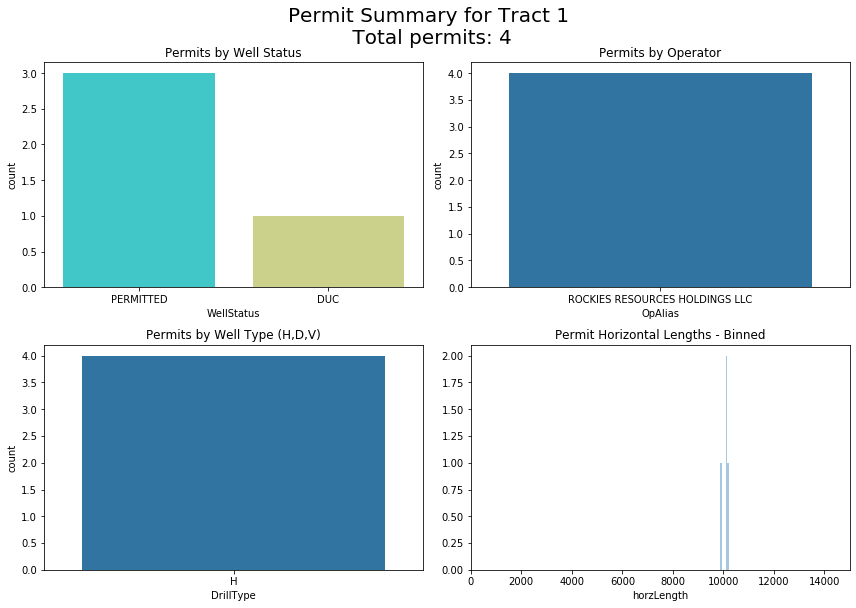

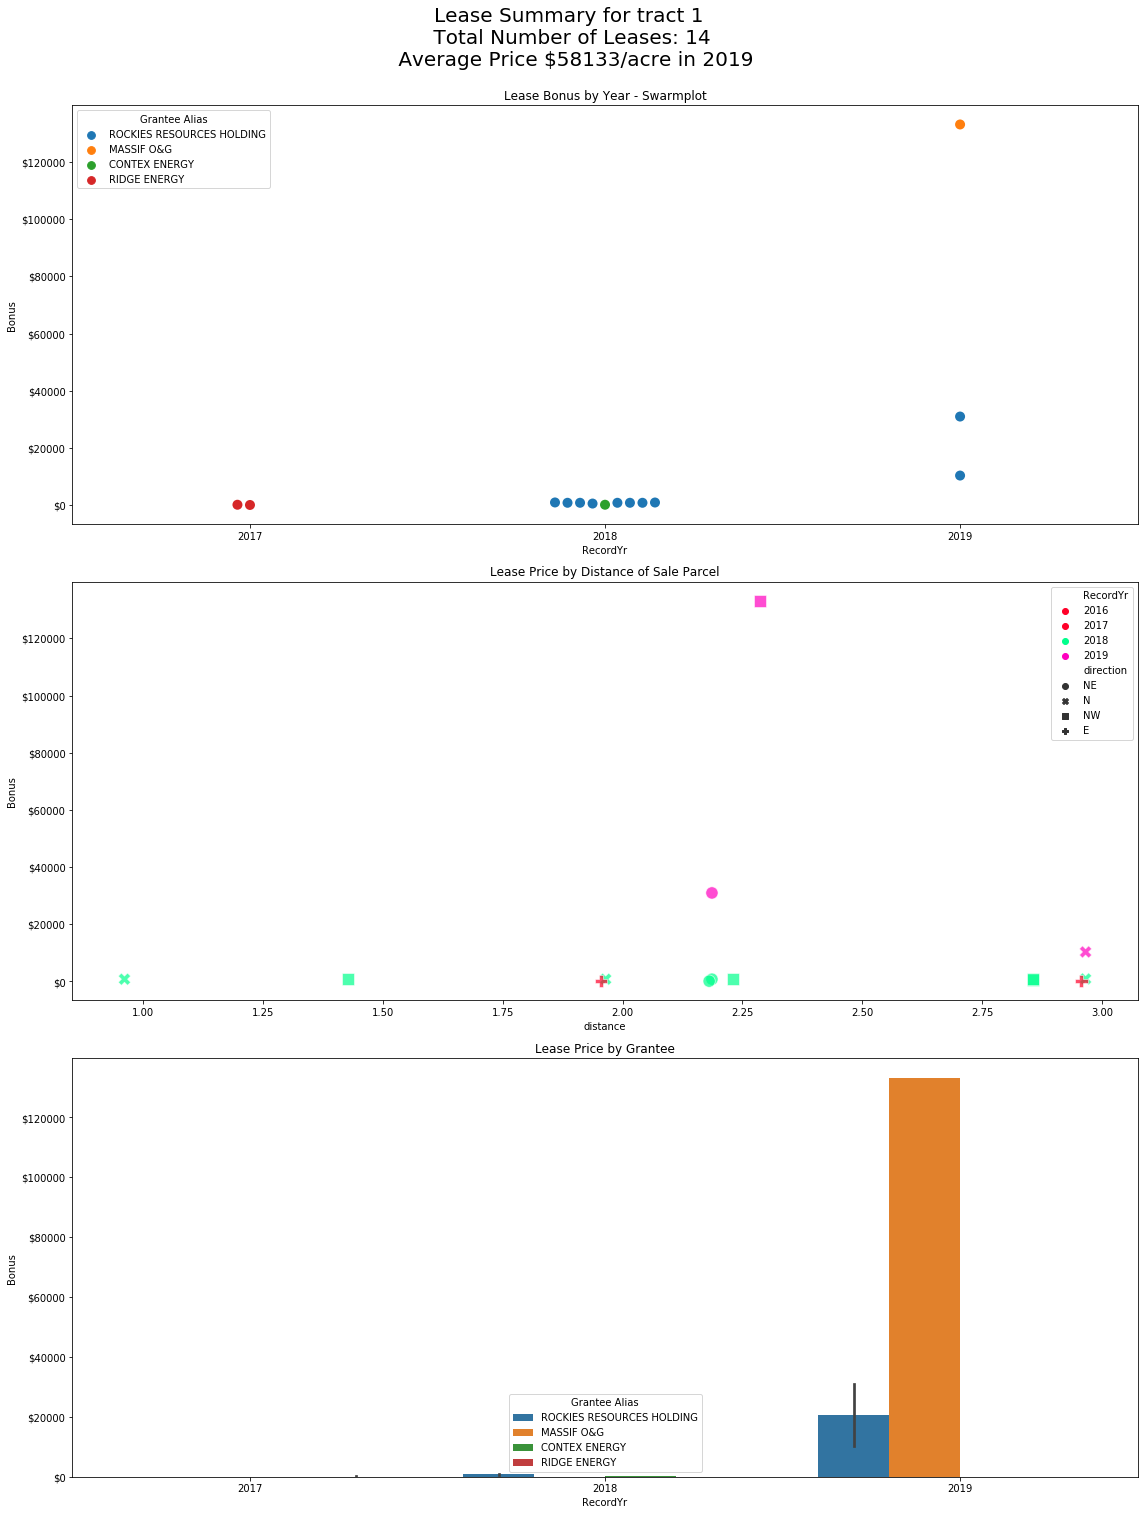

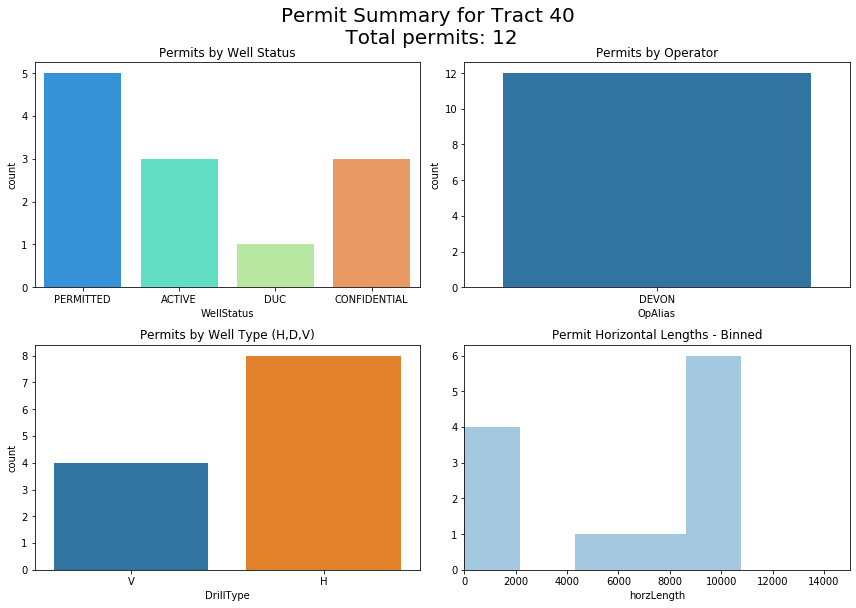

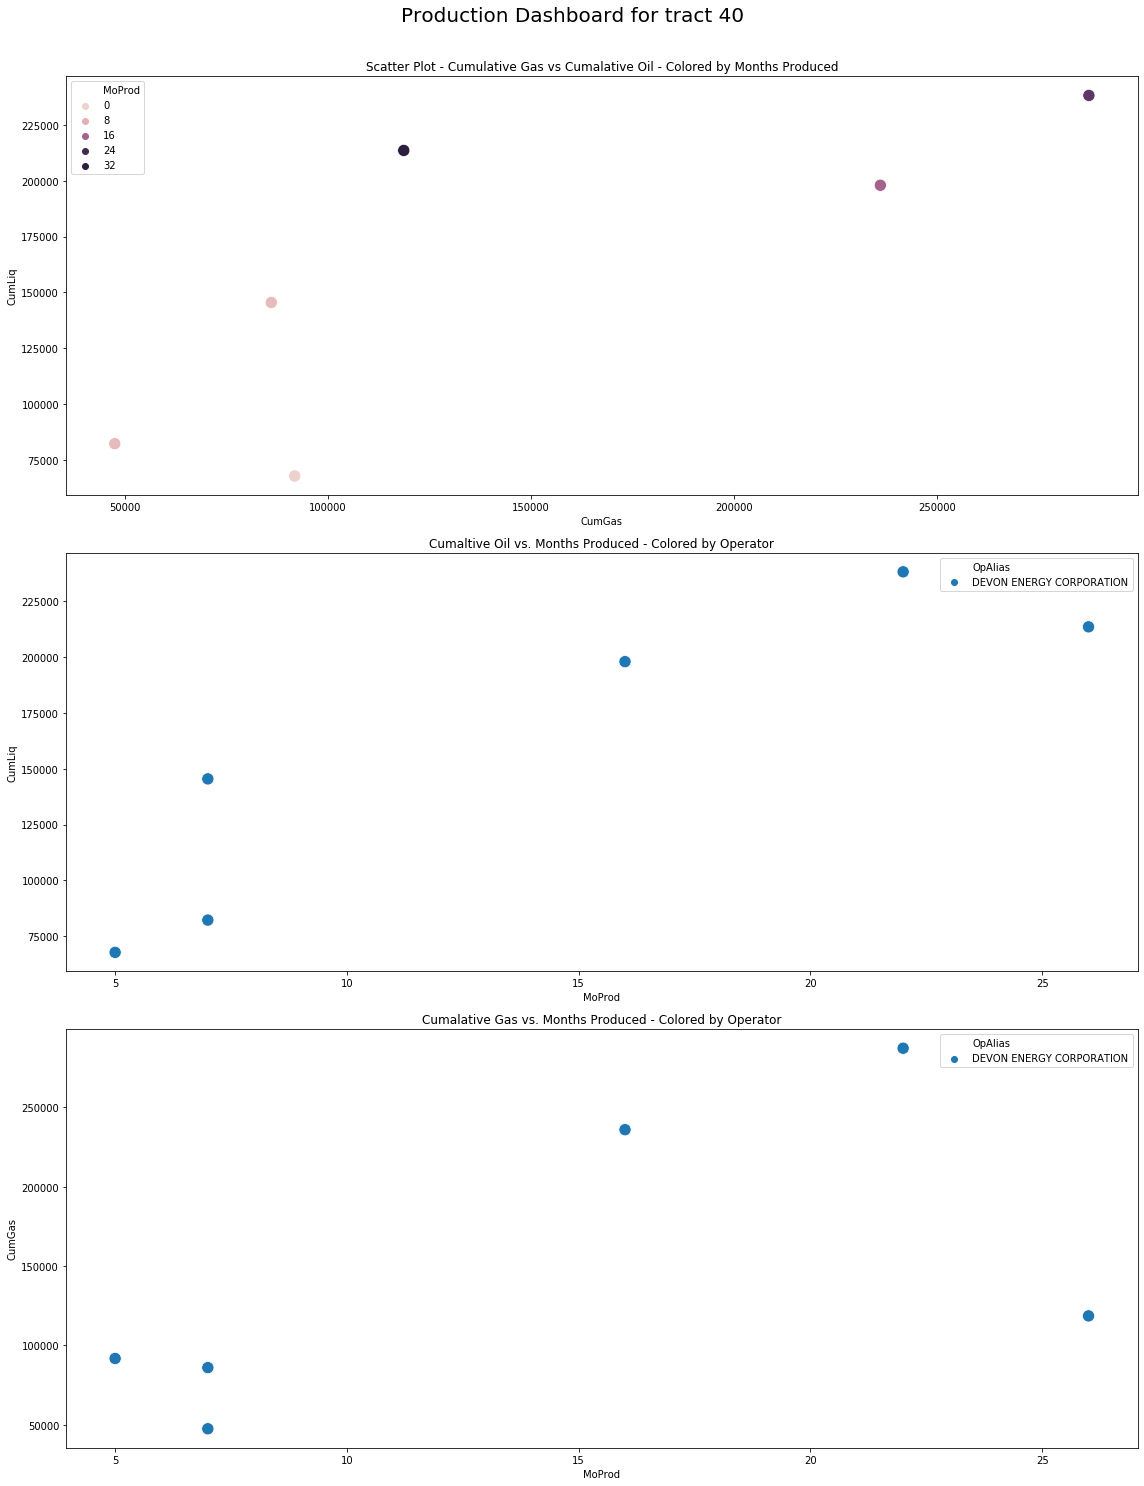

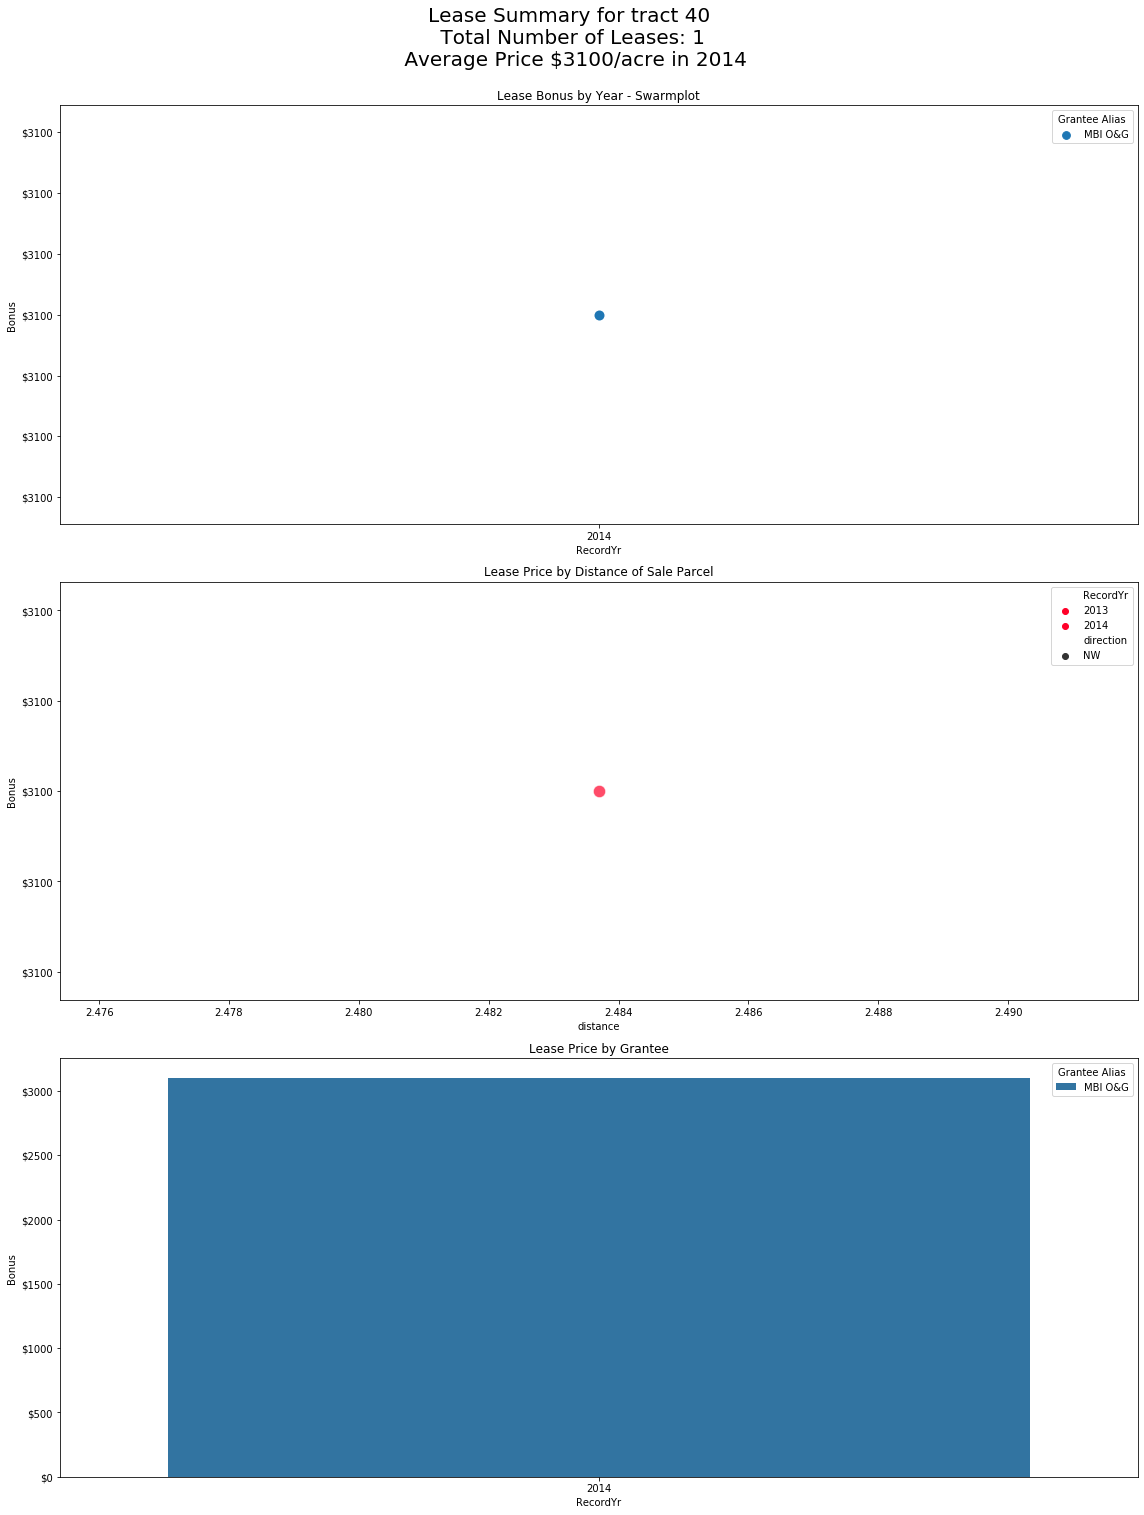

In [50]:
#test loop

perdashboard = []
proddashboard = []
leasedashboard = []

for i in range(15,17):
    
    tract = tractshp["tract_id"].iloc[i]
    
    a, b, c = prepareTractFilter(tract)
    
    perdashboard.append(createPermitDash(a,tract))
    proddashboard.append(createProdDash(b, tract))
    leasedashboard.append(createLeasesDash(c, tract))
    
    


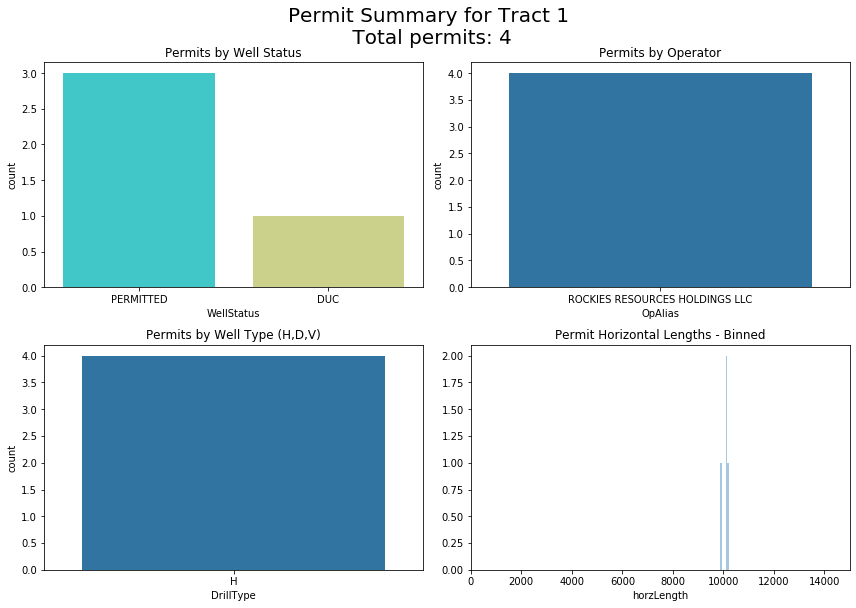

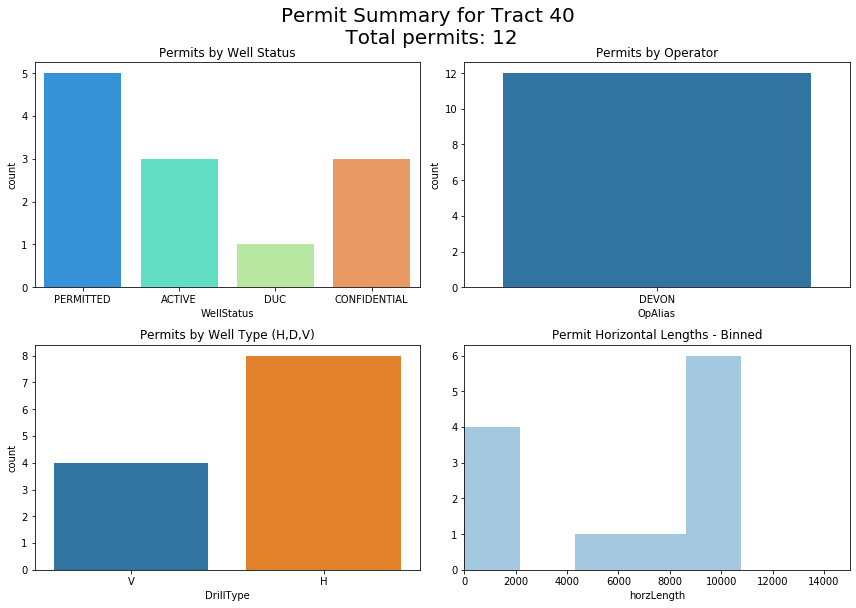

In [51]:
for i in perdashboard:
    i

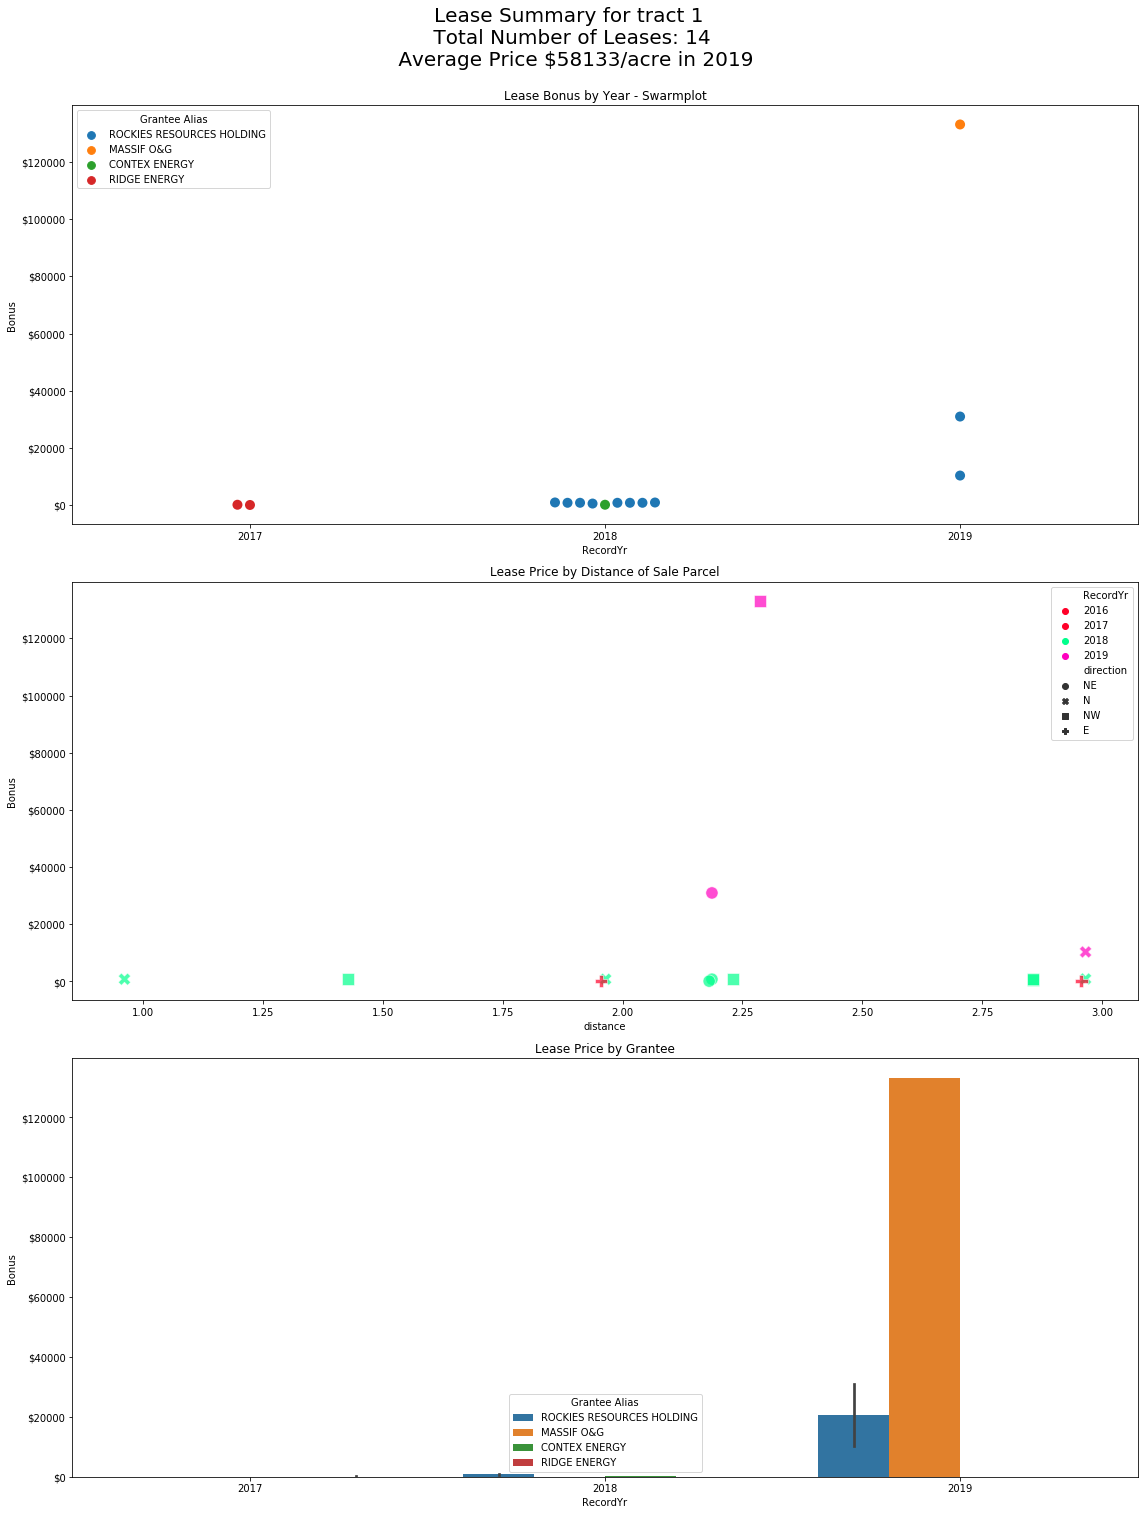

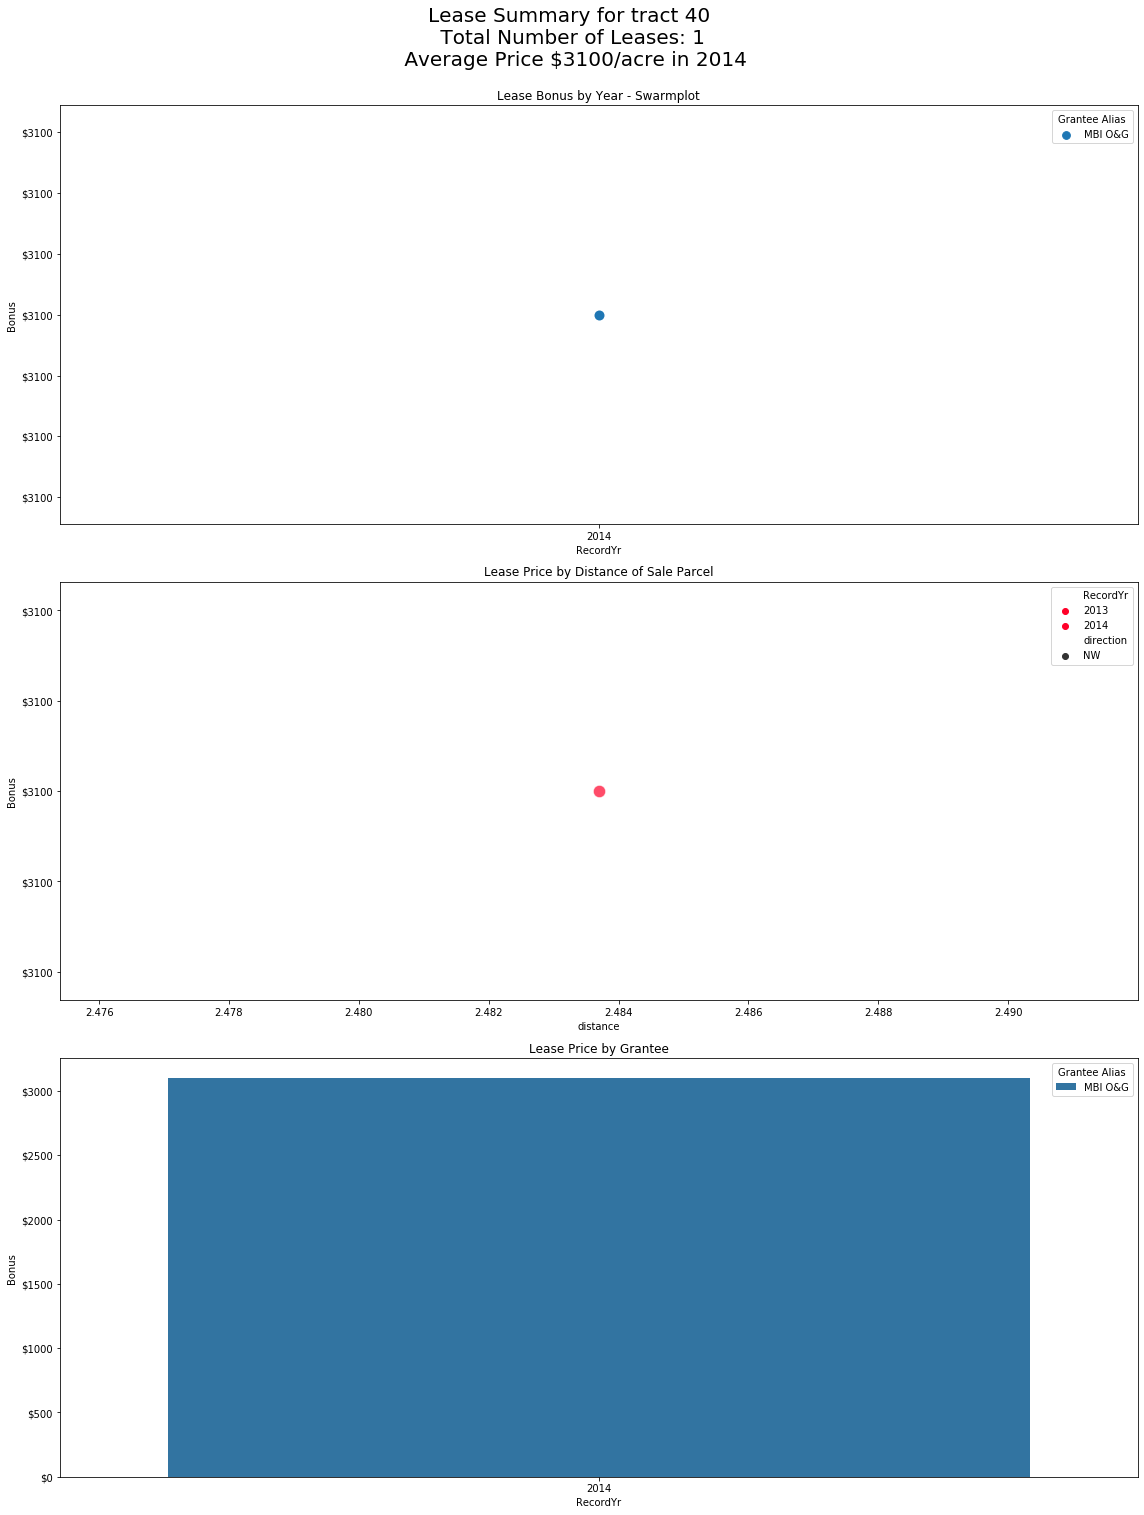

In [52]:
for i in leasedashboard:
    i

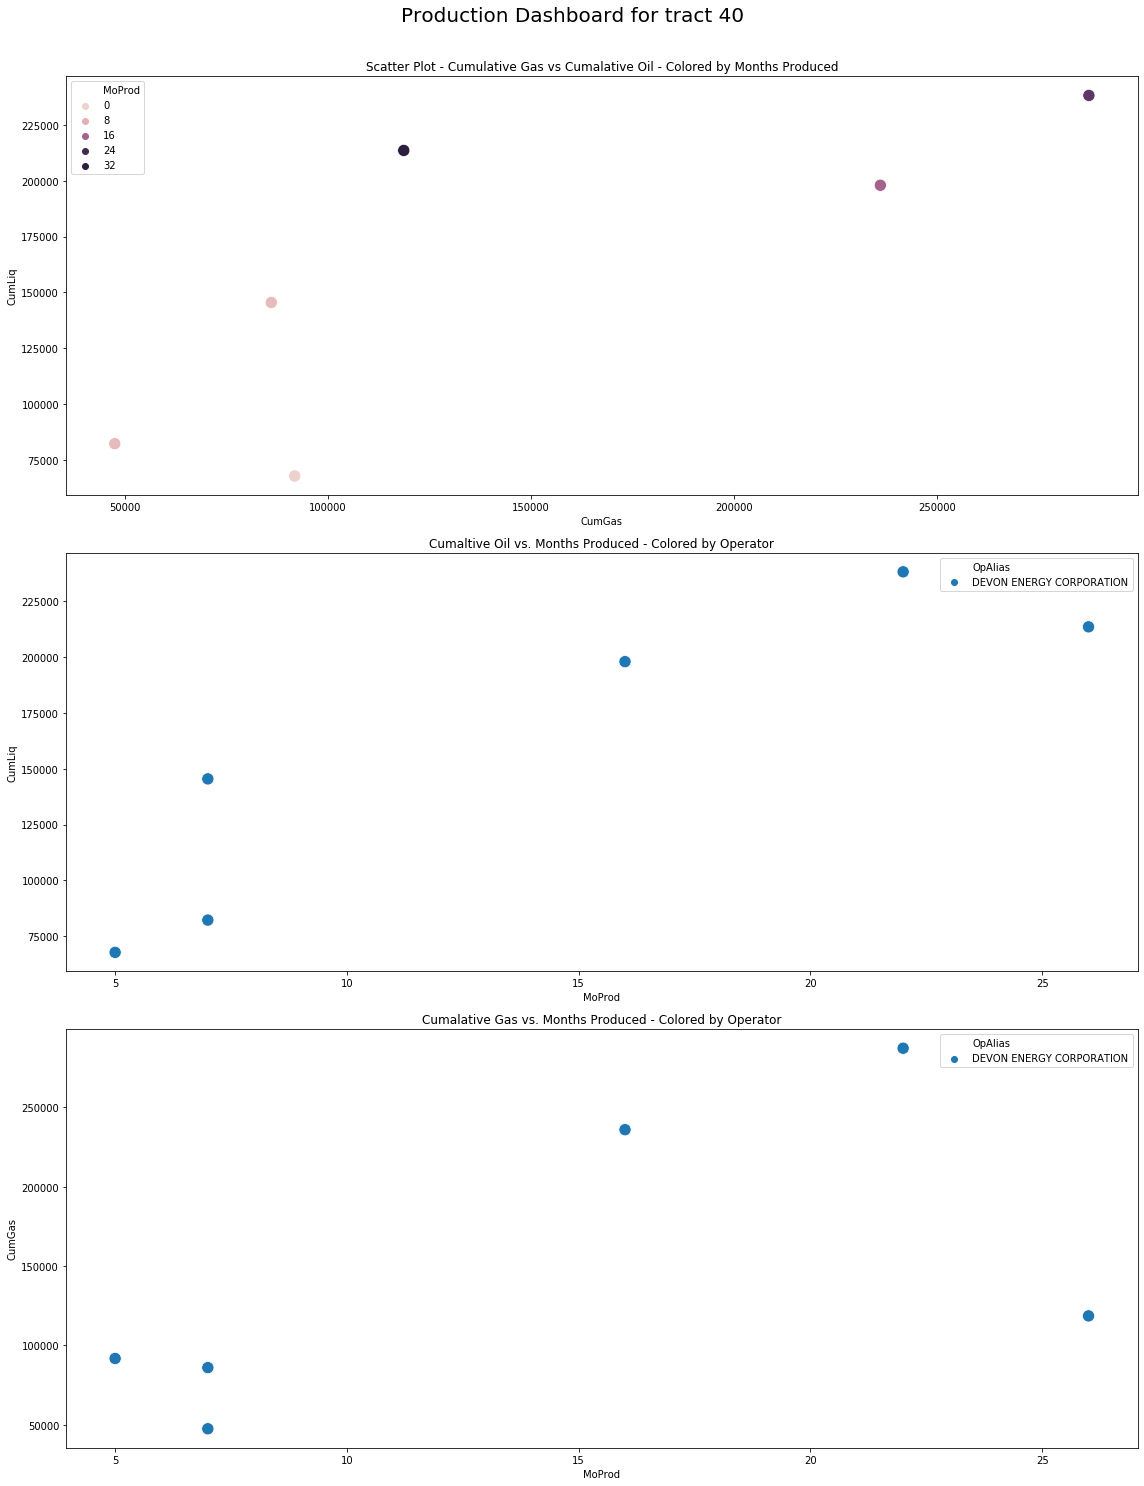

In [53]:
for i in proddashboard:
    i

# Machine Learning and Price Projections Section

In [55]:
#get historical oil price data
oilPrices = pd.read_excel("Data/oilPrices.xls", sheet_name="Data 1", header=2)

In [56]:
oilPrices.columns

Index(['Date', 'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)'], dtype='object')

In [57]:
#renaming price column to something more concise 
oilPrices.rename(columns = {'Cushing, OK WTI Spot Price FOB (Dollars per Barrel)' : "WTI Price"} , inplace = True)


In [58]:
#appending data to the data frame for missing monthsd manually - setting march 2020 price to $25/bbl
oilPrices = oilPrices.append({'Date': pd.to_datetime('2020-03-15', format='%Y-%m-%d', errors='ignore'), 'WTI Price': 25}, ignore_index = True)

#Setting the index of the dataframe as the date and then filtering to data within last 10 years
oilPrices.set_index("Date", inplace = True)
oilPrices = oilPrices.loc[oilPrices.index.year > 1999] 

In [59]:
oilPrices.head()

,WTI Price
Date,
2000-01-15,27.26
2000-02-15,29.37
2000-03-15,29.84
2000-04-15,25.72
2000-05-15,28.79


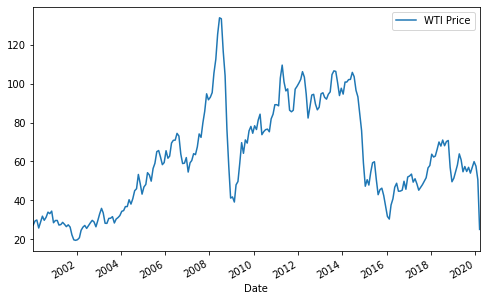

In [60]:
oilPrices.plot(figsize=(8,5))

In [61]:
#confirming data appended is present
oilPrices[oilPrices.index.year == 2020]
oilPrices.groupby(oilPrices.index.year).describe()

,WTI Price
Date,
2020-01-15,57.52
2020-02-15,50.54
2020-03-15,25.00


WTI Price                                                           \
         count       mean        std    min      25%      50%       75%   
Date                                                                      
2000      12.0  30.300833   2.668215  25.72  28.7025   29.770   32.1425   
2001      12.0  25.947500   3.568282  19.39  25.1925   27.310   27.8575   
2002      12.0  26.115000   3.174783  19.72  25.2725   26.660   28.5025   
2003      12.0  31.120833   2.317446  28.11  29.8325   30.935   32.3350   
2004      12.0  41.443333   5.867064  34.31  36.7475   40.530   45.1600   
2005      12.0  56.492500   6.260930  46.84  52.1925   57.335   60.1225   
2006      12.0  66.018333   5.476898  58.89  61.8775   64.645   70.8675   
2007      12.0  72.318333  13.217301  54.51  62.7050   69.925   81.3900   
2008      12.0  99.571667  29.067578  41.12  88.8800  104.780  118.8525   
2009      12.0  61.654167  13.795144  39.09  49.2225   66.780   71.9050   
2010      12.0  79.395000   4.722221  73.74  76.0750   77.465   82.4800   
2011      12.0  94.874167   7.671223  85.52  88.0175   96.710   99.1450   
2012      12.0  94.110833   7.566593  82.30  87.8900   94.320  100.7525   
2013      12.0  97.905833   5.278863  92.02  94.3475   95.540  101.5725   
2014      12.0  93.258333  13.768110  59.29  91.0075   98.670  102.0975   
2015      12.0  48.688333   6.755165  37.19  44.8275   47.520   51.7875   
2016      12.0  43.144167   6.837864  30.32  39.9500   44.950   47.2225   
2017      12.0  50.884167   3.813093  45.18  48.3700   50.440   52.7425   
2018      12.0  64.938333   6.458830  49.52  62.6050   67.060   70.0425   
2019      12.0  56.984167   3.394762  51.38  54.7725   56.990   58.5825   
2020       3.0  44.353333  17.119981  25.00  37.7700   50.540   54.0300   

              
         max  
Date          
2000   34.42  
2001   29.61  
2002   29.66  
2003   35.83  
2004   53.28  
2005   65.59  
2006   74.41  
2007   94.77  
2008  133.88  
2009   77.99  
2010   89.15  
2011  109.53  
2012  106.16  
2013  106.57  
2014  105.79  
2015   59.82  
2016   51.97  
2017   57.88  
2018   70.98  
2019   63.86  
2020   57.52

In [129]:
#get historical gas price data
gasPrices = pd.read_excel("Data/gasPrices.xls", sheet_name="Data 1", header=2)

In [130]:
gasPrices.set_index('Date', inplace = True)
gasPrices.rename(columns = {'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)': 'Gas Price'}, inplace = True)
gasPrices = gasPrices.loc[gasPrices.index.year > 1999] 


In [132]:
gasPrices.groupby(gasPrices.index.year).describe()

Gas Price                                                         
         count      mean       std   min     25%    50%      75%    max
Date                                                                   
2000      12.0  4.309167  1.769753  2.42  2.9775  4.140   5.0300   8.90
2001      12.0  3.956667  1.812790  2.19  2.4300  3.415   5.2000   8.17
2002      12.0  3.366667  0.707856  2.32  3.0200  3.345   3.6725   4.74
2003      12.0  5.485833  0.894310  4.47  4.9000  5.345   5.8475   7.71
2004      12.0  5.900000  0.476521  5.15  5.4050  6.035   6.2850   6.58
2005      12.0  8.811667  2.704981  6.14  6.8375  7.405  10.6625  13.42
2006      12.0  6.745000  0.966423  4.90  6.2000  6.810   7.2225   8.69
2007      12.0  6.976667  0.621806  6.08  6.4675  7.105   7.4125   8.00
2008      12.0  8.861667  2.102349  5.82  7.4375  8.400  10.4075  12.69
2009      12.0  3.948333  0.749471  2.99  3.4700  3.815   4.1375   5.35
2010      12.0  4.386667  0.675861  3.43  3.9950  4.270   4.6725   5.83
2011      12.0  4.000000  0.460810  3.17  3.8175  4.075   4.3375   4.54
2012      12.0  2.752500  0.484489  1.95  2.4525  2.755   3.0425   3.54
2013      12.0  3.728333  0.303160  3.33  3.5725  3.660   3.8825   4.24
2014      12.0  4.391667  0.670384  3.48  3.9175  4.350   4.6725   6.00
2015      12.0  2.630000  0.334229  1.93  2.5425  2.775   2.8425   2.99
2016      12.0  2.515000  0.559667  1.73  1.9725  2.570   2.8600   3.59
2017      12.0  2.985833  0.139835  2.82  2.8800  2.980   3.0325   3.30
2018      12.0  3.166667  0.529843  2.67  2.8000  2.965   3.4275   4.09
2019      12.0  2.565833  0.276256  2.22  2.3600  2.600   2.6600   3.11
2020       3.0  1.906667  0.115036  1.79  1.8500  1.910   1.9650   2.02

In [162]:
gasPrices.loc[gasPrices[gasPrices.index.year ==2014].idxmax()]

,Gas Price
Date,
2014-02-15,6.0


Int64Index([12], dtype='int64', name='Date')

### testing out data gathering and modeling on sample tract

#import training data for certain AOI
#permit data will include all permits for new wells in the AOI
#prod data will include wells within last 8 years
#training will be don by looking at a lease sold with a bonus price, then determine how many permits, production, etc there was for that particular lease during the time of the sale
#therefore, we will to filter down the dataset for a buffer around that lease
#then using custom measures, perhaps oil price, bbls per month per well, number of permits by type, permits by type * avg prod in area = lease bonus


## Read and Clean Data

In [251]:
AOI = gp.read_file("zip://Data/Training Data/AOI.zip")

In [252]:
#read in csv into pandas first and then convert it into a geopandas dataframe and set crs and geometry column
trainLeasesPandasDF = pd.read_csv("Data/Training Data/LeaseTraining.CSV")
trainLeases = gp.GeoDataFrame(trainLeasesPandasDF, crs = {'init': 'epsg:4326'}, geometry=gp.points_from_xy(trainLeasesPandasDF["Longitude (WGS84)"], trainLeasesPandasDF["Latitude (WGS84)"]))

trainPermits = gp.read_file("zip://Data/Training Data/PermitsTraining.zip")
trainProd = gp.read_file("zip://Data/Training Data/ProdTraining.zip")

In [253]:
trainLeases.info()
trainPermits.info()
trainProd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4289 entries, 0 to 4288
Data columns (total 42 columns):
State/Province                        4289 non-null object
Effective Date                        2063 non-null object
Record Date                           4289 non-null object
Expiration of Primary Term            4288 non-null object
Term (Months)                         4203 non-null float64
Grantor                               4289 non-null object
Grantee Alias                         4266 non-null object
Royalty                               2082 non-null float64
Bonus                                 877 non-null float64
Area (Acres)                          4069 non-null float64
Section                               4289 non-null float64
Township                              4289 non-null float64
Township Direction                    4289 non-null object
Range                                 4289 non-null float64
Range Direction                       4289 non-null o

In [254]:
trainLeases.columns


Index(['State/Province', 'Effective Date', 'Record Date',
       'Expiration of Primary Term', 'Term (Months)', 'Grantor',
       'Grantee Alias', 'Royalty', 'Bonus', 'Area (Acres)', 'Section',
       'Township', 'Township Direction', 'Range', 'Range Direction',
       'Vol/Page', 'Record Number', 'Instrument Type', 'Instrument Date',
       'County/Parish', 'Options/Extensions', 'DI Basin', 'Ext. Bonus',
       'Ext. Term (Months)', 'Abstract', 'Block', 'BLM', 'State Lease',
       'Grantee', 'Grantor Address', 'Grantee Address', 'Max Depth',
       'Majority Legal Assignee', 'DI Subplay', 'Min Depth',
       'Majority Assignment Effective Date', 'Latitude (WGS84)', 'DI Play',
       'Majority Legal Assignee Interest', 'Longitude (WGS84)',
       'Majority Assignment Vol/Page', 'geometry'],
      dtype='object')

In [255]:
trainLeases = trainLeases.loc[:,["Record Date", "Record Number", "Bonus", "Section", "Township", "Range", "geometry"]]
trainLeases.dropna(axis=0, subset = ["Bonus"], inplace = True)


In [256]:
trainPermits.columns

Index(['API10UWI', 'WGID', 'PermitNo', 'Country', 'OFS_Reg', 'State', 'County',
       'DIBasin', 'DIPlay', 'DISubplay', 'District', 'OpAlias', 'OpCompany',
       'OpReported', 'OpTicker', 'LeaseName', 'WellNo', 'LeaseNo', 'Field',
       'Formation', 'PermitType', 'WellType', 'DrillType', 'PermDepth',
       'PermDUOM', 'TVD', 'TVD_UOM', 'PermStatus', 'WellStatus', 'FiledDate',
       'AprvdDate', 'AmendDate', 'CntctName', 'CntctPhone', 'OperAddrs',
       'OperCity', 'OperState', 'OperZip', 'OperCity30', 'OperCity50',
       'Section', 'Township', 'Range', 'Block', 'Survey', 'Abstract',
       'H2S_Area', 'Latitude', 'Longitude', 'Btm_Lat', 'Btm_Lon', 'ExpDate',
       'geometry'],
      dtype='object')

In [257]:
trainPermits.drop(columns=['Country', 'OFS_Reg', 'State', 'County',
       'DIBasin', 'DIPlay', 'DISubplay', 'District', 'OpAlias', 'OpCompany',"DISubplay",'AmendDate', 'CntctName', 'CntctPhone', 'OperAddrs',
       'OperCity', 'OperState', 'OperZip', 'OperCity30', 'OperCity50', 'H2S_Area'], inplace = True)


#### Eventually want to create column of well trajectory in order to determine if a lease has permitted wells going through it has an extra learning parameter
from shapely.geometry import LineString

trainPermits.head()
trainPermits["BHL"] = gp.points_from_xy(trainPermits["Btm_Lon"], trainPermits["Btm_Lat"])
trainPermits["SHL"] = gp.points_from_xy(trainPermits["Longitude"], trainPermits["Latitude"])

a = trainPermits.iloc[0]

line = LineString([(0, 0), (1, 1)])
line2 = LineString([(a["BHL"]),(a["SHL"])])

pd.isnull(trainPermits["BHL"]).value_counts()

In [258]:
pd.options.display.max_columns = None
trainProd.info()



<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7471 entries, 0 to 7470
Columns: 111 entries, APIUWI to geometry
dtypes: float64(66), geometry(1), int64(2), object(42)
memory usage: 6.3+ MB


In [259]:
trainProd.drop(columns = ['EntityType','OCS_Area', 'PGC_Area','EntityId', 'OpTicker', 'OpReported', 'OpCompany',
                          'OtherNo','DIBasin', 'DIPlay','DISubplay','CumWtr','CumMMCFGE','CumBCFGE', 
                          'PrcIPCFGED','PracIP_BOE','LastTestDt','LastFlwPrs','LastWHSIP','2moGOR','LatestGOR',
                          'CumGOR','Lst12Yield','2moYield','LatestYld','PeakGas','PkGasMoNo','PeakLiq','PkLiqMoNo',
                          'PeakBOE','PkBOEMoNo','PkMMCFGE','PkMMCFGMoN','TopPerf','BtmPerf','GasGrav',
                          'OilGrav','CompDate','Field','Country','State','District','GeoProvin'], inplace = True)

In [260]:
#finding any columns containing water information and dropping them
watercols = list(filter(lambda x: "wtr" in x.lower() or "water" in x.lower(), trainProd.columns))

In [261]:
trainProd.drop(columns = watercols, inplace=True)

In [262]:
trainProd.columns

Index(['APIUWI', 'OpAlias', 'LeaseName', 'WellNo', 'County', 'Reservoir',
       'ProdType', 'ProdStatus', 'DrillType', 'LeaseNo', 'FstPrdDate',
       'LstPrdDate', 'CumGas', 'CumLiq', 'CumBOE', 'DailyGas', 'DailyLiq',
       '1moLiq', '1moGas', '6moLiq', '6moGas', '6moBOE', '12moLiq', '12moGas',
       '12moBOE', '12MMCFGE', '24moLiq', '24moGas', '24moBOE', '24moMMCFGE',
       '60moLiq', '60moGas', '60moBOE', '60moMMCFGE', 'PracIP_Liq',
       'PracIP_Gas', 'LatestLiq', 'LatestGas', 'Prior12Liq', 'Prior12Gas',
       'WellCount', 'MaxActvWel', 'MoProd', 'GasGather', 'LiqGather',
       'SpudDate', 'TD', 'TVD', 'PerfLength', 'Section', 'Township', 'Range',
       'Abstract', 'Block', 'Survey', 'Latitude', 'Longitude', 'Last12Liq',
       'Last12Gas', 'geometry'],
      dtype='object')

In [263]:
trainProd.dropna(subset=['FstPrdDate'], inplace=True)

In [264]:
def convertoDateTime(*dataframe):
    '''
    This function will take in arguments of a dataframe.
    It will then search each column name to see if there is a date in the name using the filter method
    The filtered list will then use the apply method to convert data in column to date time
    '''
    for df in dataframe:
        cols = list(filter(lambda x: 'date' in x.lower(), df.columns))

        for col in cols:
            df[col] = df[col].apply(lambda x: pd.to_datetime(x))

In [265]:
convertoDateTime(trainProd, trainLeases,trainPermits)

In [266]:
trainLeases.info()
trainPermits.info()
trainProd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 877 entries, 57 to 4288
Data columns (total 7 columns):
Record Date      877 non-null datetime64[ns]
Record Number    877 non-null object
Bonus            877 non-null float64
Section          877 non-null float64
Township         877 non-null float64
Range            877 non-null float64
geometry         877 non-null geometry
dtypes: datetime64[ns](1), float64(4), geometry(1), object(1)
memory usage: 54.8+ KB
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2799 entries, 0 to 2798
Data columns (total 33 columns):
API10UWI      2799 non-null object
WGID          2799 non-null object
PermitNo      2799 non-null object
OpReported    2799 non-null object
OpTicker      1479 non-null object
LeaseName     2799 non-null object
WellNo        2799 non-null object
LeaseNo       2462 non-null object
Field         2799 non-null object
Formation     2799 non-null object
PermitType    2799 non-null object
WellType      2799 non-null 

In [267]:
convertCRS(AOI, trainProd, trainLeases, trainPermits)


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}


{'init': 'epsg:4326'}
Converted to:
{'init': 'epsg:26913', 'no_defs': True}




### Function to test filtering around training lease

In [293]:
trainLeases["buffers"] = trainLeases.buffer(milesbuffer)

#creating list of columns for learning variables on particular lease
learningCols = ["Total Permits", "Total Wells", "Avg First 6 Mo Oil", "Avg First 6 Mo Gas", "Qi Oil", "Qi Gas", "6 Mo Oil Revenue $", "Oil Price", "Gas Price" ]

#initializing null values to colums containing varialbes to learn
for col in learningCols:
    trainLeases[col] = np.nan

In [294]:
#testing
leaseDf = trainLeases[trainLeases["Record Number"] == 'WYW182806']
leaseDf = leaseDf.iloc[0]

#pulling date from lease for evaluations to create filter on permit and prod datasets
filterDate = leaseDf["Record Date"]
filterDate

#filtering production dataframe to within buffer of lease for evaluation & only wells taht had started producing before the date lease was recorded
prodFilter = trainProd.loc[trainProd.within(leaseDf["buffers"])]
prodFilter = trainProd.loc[trainProd["FstPrdDate"] <= filterDate]

#filtering production dataframe to within buffer of lease for evaluation & only wells taht had started producing before the date lease was recorded
permFilter = trainPermits.loc[trainPermits.within(leaseDf["buffers"])]

#creating a filter to only show active permits within time lease was purchased
permFilter = trainPermits.loc[(trainPermits["ExpDate"]>=filterDate) & (trainPermits["AprvdDate"]<=filterDate)]



Timestamp('2014-02-11 00:00:00')

In [295]:
#saving learning variable: total number of active permits
totalActivePermits = len(permFilter)

totalActivePermits

233

In [296]:
#finding month in oil and gas price dataframes based on record date of lease
#formatting data to find by month and year only
searchMonthYr = "{}-{}".format(filterDate.month, filterDate.year)

#saving gas and oil price from the time of the record date of the lease
oilPriceYr = oilPrices.loc[searchMonthYr]["WTI Price"].iloc[0]
gasPriceYr = gasPrices.loc[searchMonthYr]["Gas Price"].iloc[0]

oilPriceYr, gasPriceYr

(100.82, 6.0)

In [297]:


#getting variables to learn on from production dataframe
totalWells = len(prodFilter)
Avg6MoOilProd = prodFilter["6moLiq"].mean()
Avg6MoGasProd = prodFilter["6moGas"].mean()

#multiplying Initial production daily rates for the given month by 30 to get it into a Qi monthly rate
IPoil = prodFilter["PracIP_Liq"].mean() * 30
IPgas = prodFilter["PracIP_Gas"].mean() * 30

totalWells, Avg6MoOilProd,Avg6MoGasProd, IPoil, IPgas

(412,
 17446.01265822785,
 23989.017721518987,
 4731.334951456311,
 6415.339805825243)

In [298]:
learningCols

#making a list of all the learning variables saved
learningVals = [totalActivePermits, totalWells, Avg6MoOilProd,Avg6MoGasProd, IPoil, IPgas, oilPriceYr, gasPriceYr]

#converting all learning variables to integers to drop float decimals
learningVals = list(map(int, learningVals))

#zipping learning value with the column name it belongs to as a tuple pair
learningPairs = list(zip(learningCols, learningVals))


['Total Permits',
 'Total Wells',
 'Avg First 6 Mo Oil',
 'Avg First 6 Mo Gas',
 'Qi Oil',
 'Qi Gas',
 '6 Mo Oil Revenue $',
 'Oil Price',
 'Gas Price']

In [299]:
trainLeases[trainLeases["Record Number"] == 'WYW182806'].index
trainLeases.loc[trainLeases.index == 2420]
 
#appending learning value to its corresponding dataframe column for the given lease
for pair in learningPairs:
    trainLeases.loc[trainLeases.index == 2420, pair[0]] = pair[1]
    
trainLeases.loc[trainLeases.index == 2420]

Int64Index([2420, 2421], dtype='int64')

,Record Date,Record Number,Bonus,Section,Township,Range,geometry,buffers,Total Permits,Total Wells,Avg First 6 Mo Oil,Avg First 6 Mo Gas,Qi Oil,Qi Gas,Oil Price,Gas Price,Record Year,6 Mo Oil Revenue $
2420,2014-02-11,WYW182806,3900.0,10.0,39.0,72.0,POINT (460251.600 4801972.654),"POLYGON ((465079.620 4801972.654, 465056.372 4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,NaN


,Record Date,Record Number,Bonus,Section,Township,Range,geometry,buffers,Total Permits,Total Wells,Avg First 6 Mo Oil,Avg First 6 Mo Gas,Qi Oil,Qi Gas,Oil Price,Gas Price,Record Year,6 Mo Oil Revenue $
2420,2014-02-11,WYW182806,3900.0,10.0,39.0,72.0,POINT (460251.600 4801972.654),"POLYGON ((465079.620 4801972.654, 465056.372 4...",233.0,412.0,17446.0,23989.0,4731.0,6415.0,6.0,NaN,2014,100.0


### Function for gathering training measures

In [300]:
def getTrainingMeasures(trainLeases, leaseIndex, trainProd, trainPermits, trainingData = True):
    
    '''
    This function will take in 3 dataframes
    1. trainLeases will be the cleaned dataframe that holds lease information with bonus price OR leases for evaluation
    2. trainProd is the cleaned dataframe that holds production necessary for evaluating leases
    3. trainPermits is the cleaned dataframe that holds permits necessary for evaluating leases
    
    The function will take in an index from the trainLeases to perform the following actions:
        - The fuction will filter and retrieve permit and production data within a 3 mile radius from the lease point
        - It will also find the oil/gas price for the month the lease was recorded
        - Filters will be applied to the found permit and production data in order to get a snapshot of the data that existed during the time of purchasing the lease
        - Measures such as average First 6 month oil production and total number of wells will be stored in columns as the inputs (x vars) for the ML model
    '''
    
    #Getting single lease from data 
    leaseDf = trainLeases.loc[trainLeases.index == leaseIndex]
    leaseDf = leaseDf.iloc[0]
    
    #checking whether not function called is on trainingData or testing data
    #testing data is defined as the parcels in the sale currently being evaluated
    if trainingData:
        #pulling date from lease for evaluations to create filter on permit and prod datasets
        filterDate = leaseDf["Record Date"]
    else:
        filterDate = saleDate

    #filtering production dataframe to within buffer of lease for evaluation & only wells taht had started producing before the date lease was recorded
    prodFilter = trainProd.loc[trainProd.within(leaseDf["buffers"])]
    prodFilter = trainProd.loc[trainProd["FstPrdDate"] <= filterDate]

    #filtering production dataframe to within buffer of lease for evaluation & only wells taht had started producing before the date lease was recorded
    permFilter = trainPermits.loc[trainPermits.within(leaseDf["buffers"])]

    #creating a filter to only show active permits within time lease was purchased
    permFilter = trainPermits.loc[(trainPermits["ExpDate"]>=filterDate) & (trainPermits["AprvdDate"]<=filterDate)]

    #saving learning variable: total number of active permits
    totalActivePermits = len(permFilter)
    
    #finding month in oil and gas price dataframes based on record date of lease
    #formatting data to find by month and year only
    searchMonthYr = "{}-{}".format(filterDate.month, filterDate.year)

    #saving gas and oil price from the time of the record date of the lease
    oilPriceYr = oilPrices.loc[searchMonthYr]["WTI Price"].iloc[0]
    gasPriceYr = gasPrices.loc[searchMonthYr]["Gas Price"].iloc[0]
    
    #getting variables to learn on from production dataframe
    totalWells = len(prodFilter)
    Avg6MoOilProd = prodFilter["6moLiq"].mean()
    Avg6MoGasProd = prodFilter["6moGas"].mean()

    #multiplying Initial production daily rates for the given month by 30 to get it into a Qi monthly rate
    IPoil = prodFilter["PracIP_Liq"].mean() * 30
    IPgas = prodFilter["PracIP_Gas"].mean() * 30
    
    First6MoOilRev = Avg6MoOilProd*oilPriceYr
    
    #making a list of all the learning variables saved
    learningVals = [totalActivePermits, totalWells, Avg6MoOilProd,Avg6MoGasProd, IPoil, IPgas, First6MoOilRev,oilPriceYr, gasPriceYr]

    #converting all learning variables to integers to drop float decimals
    learningVals = list(map(int, learningVals))

    #zipping learning value with the column name it belongs to as a tuple pair
    learningPairs = list(zip(learningCols, learningVals))
    
    #appending learning value to its corresponding dataframe column for the given lease
    for pair in learningPairs:
        trainLeases.loc[trainLeases.index == leaseIndex, pair[0]] = pair[1]
    
    
    

In [302]:
for index in trainLeases.index:
    getTrainingMeasures(trainLeases, index, trainProd, trainPermits)

## Exploratory Data on Features and Target

In [303]:
trainLeases["Record Year"] = trainLeases["Record Date"].apply(lambda x: x.year)

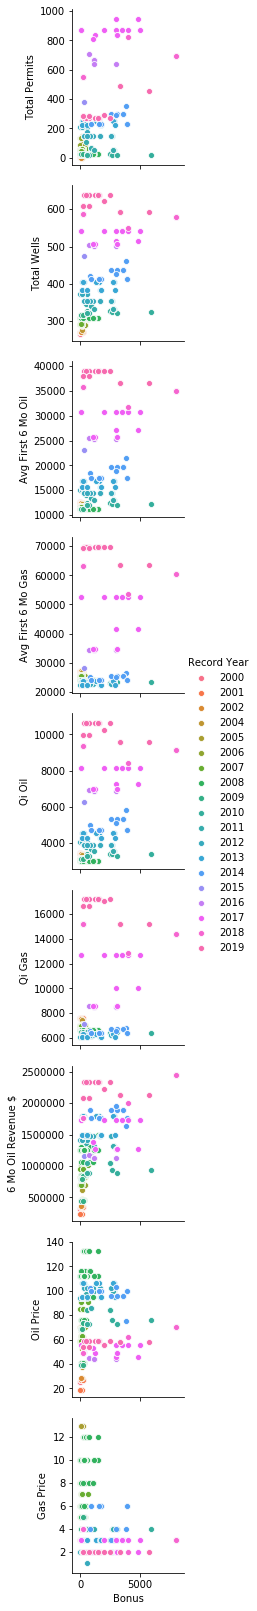

In [372]:
sns.pairplot(x_vars = "Bonus", y_vars = learningCols, hue= "Record Year", data = trainLeases.drop_duplicates("geometry"))



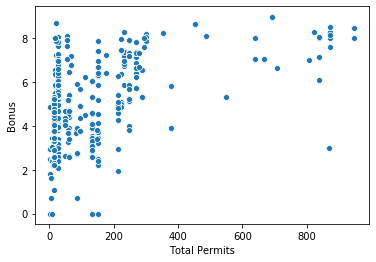

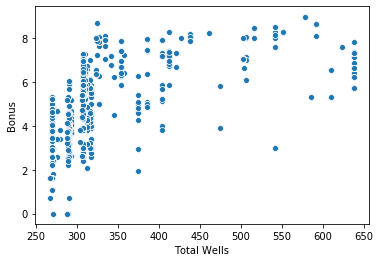

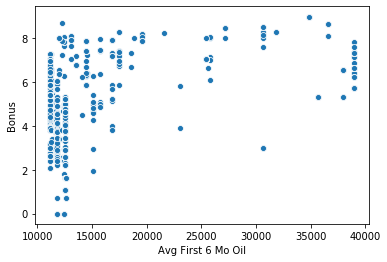

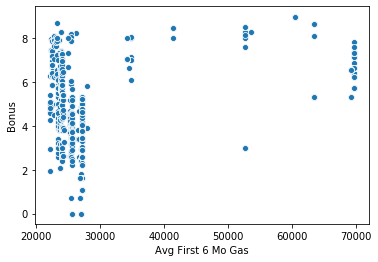

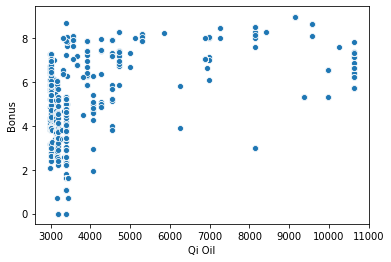

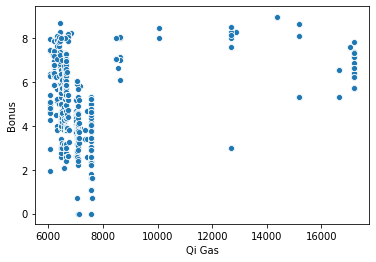

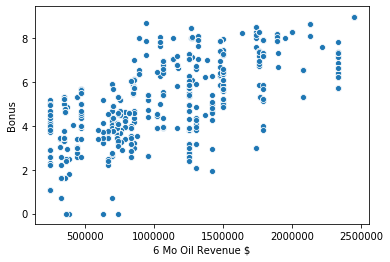

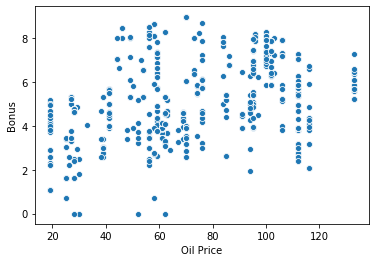

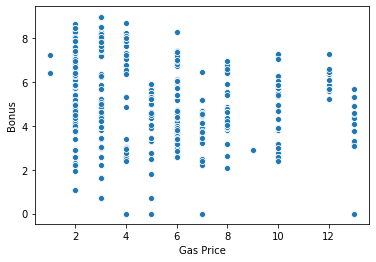

In [371]:
for col in learningCols:
    sns.scatterplot(x = trainLeases[col], y = trainLeases["Bonus"].apply(lambda x: np.log(x)))
    plt.show()

In [382]:
trainLeases.drop_duplicates(subset = "geometry").describe()

,Bonus,Section,Township,Range,Total Permits,Total Wells,Avg First 6 Mo Oil,Avg First 6 Mo Gas,Qi Oil,Qi Gas,Oil Price,Gas Price,Record Year,6 Mo Oil Revenue $,Log Bonus
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000
mean,789.450363,19.907990,38.276029,71.789346,172.326877,372.912833,16770.801453,30761.220339,4512.554479,8097.585956,77.079903,5.401937,2010.353511,1.215563e+06,5.516608
std,1300.164956,10.337333,1.050350,1.132779,218.916290,108.366679,8949.736436,14645.760711,2360.820734,3260.478632,28.035274,3.043886,4.671850,5.266431e+05,1.653612
min,3.000000,1.000000,37.000000,70.000000,2.000000,267.000000,11129.000000,22172.000000,2980.000000,6055.000000,19.000000,1.000000,2000.000000,2.420820e+05,1.098612
25%,70.000000,11.000000,37.000000,71.000000,26.000000,308.000000,11207.000000,23411.000000,3074.000000,6476.000000,56.000000,3.000000,2008.000000,7.879100e+05,4.248495
50%,220.000000,20.000000,38.000000,72.000000,62.000000,317.000000,11825.000000,24099.000000,3182.000000,6664.000000,73.000000,5.000000,2009.000000,1.252984e+06,5.393628
75%,890.000000,29.000000,39.000000,73.000000,233.000000,404.000000,16808.000000,26290.000000,4550.000000,7108.000000,102.000000,7.000000,2013.000000,1.500547e+06,6.791221
max,8004.000000,36.000000,40.000000,74.000000,948.000000,638.000000,38992.000000,69716.000000,10633.000000,17201.000000,133.000000,13.000000,2019.000000,2.450746e+06,8.987697


In [305]:
trainLeases.corr()

,Bonus,Section,Township,Range,Total Permits,Total Wells,Avg First 6 Mo Oil,Avg First 6 Mo Gas,Qi Oil,Qi Gas,Oil Price,Gas Price,Record Year,6 Mo Oil Revenue $
Bonus,1.000000,0.078002,0.149267,0.195884,0.466516,0.406957,0.360724,0.257671,0.360496,0.234907,0.127577,-0.276107,0.453255,0.473826
Section,0.078002,1.000000,0.271672,0.104497,-0.091297,-0.061990,-0.054065,-0.044946,-0.051634,-0.039246,-0.023145,0.002815,-0.064403,-0.035931
Township,0.149267,0.271672,1.000000,0.187843,-0.087189,-0.041855,-0.031464,-0.052737,-0.020392,-0.040421,-0.084590,-0.114616,-0.095456,-0.029192
Range,0.195884,0.104497,0.187843,1.000000,0.073047,0.130190,0.117964,0.100959,0.125751,0.104810,-0.002523,0.007818,0.101679,0.135030
Total Permits,0.466516,-0.091297,-0.087189,0.073047,1.000000,0.810455,0.791556,0.679207,0.784108,0.643993,-0.148580,-0.404184,0.756234,0.586293
Total Wells,0.406957,-0.061990,-0.041855,0.130190,0.810455,1.000000,0.977573,0.911981,0.978028,0.892987,-0.072141,-0.447827,0.913193,0.815925
Avg First 6 Mo Oil,0.360724,-0.054065,-0.031464,0.117964,0.791556,0.977573,1.000000,0.967967,0.999472,0.956454,-0.225940,-0.476498,0.814623,0.724459
Avg First 6 Mo Gas,0.257671,-0.044946,-0.052737,0.100959,0.679207,0.911981,0.967967,1.000000,0.966150,0.998392,-0.291050,-0.383505,0.700713,0.635124
Qi Oil,0.360496,-0.051634,-0.020392,0.125751,0.784108,0.978028,0.999472,0.966150,1.000000,0.955499,-0.229889,-0.485744,0.813768,0.723532
Qi Gas,0.234907,-0.039246,-0.040421,0.104810,0.643993,0.892987,0.956454,0.998392,0.955499,1.000000,-0.310806,-0.379273,0.668153,0.611992


In [378]:
#adding log bonus since bonus and revenue 6 months oil appear to be an exponential relationship
trainLeases["Log Bonus"] = trainLeases["Bonus"].apply(lambda x: np.log(x))

In [375]:
trainLeases.describe()

,Bonus,Section,Township,Range,Total Permits,Total Wells,Avg First 6 Mo Oil,Avg First 6 Mo Gas,Qi Oil,Qi Gas,Oil Price,Gas Price,Record Year,6 Mo Oil Revenue $,Log Bonus
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,8.770000e+02,877.000000
mean,574.142531,19.392246,38.291904,71.834664,151.038769,361.732041,16484.315849,31146.660205,4438.399088,8233.140251,70.466363,5.524515,2009.118586,1.106845e+06,5.011540
std,1119.452950,10.551086,1.075502,1.052843,203.482199,112.757488,9015.232059,14619.003764,2386.002081,3257.069869,31.537219,3.058546,5.419151,5.794066e+05,1.744290
min,1.000000,1.000000,37.000000,70.000000,1.000000,267.000000,11129.000000,22172.000000,2980.000000,6055.000000,19.000000,1.000000,2000.000000,2.420820e+05,0.000000
25%,45.000000,11.000000,37.000000,71.000000,25.000000,291.000000,11207.000000,23781.000000,3074.000000,6496.000000,49.000000,3.000000,2006.000000,6.932040e+05,3.806662
50%,175.000000,20.000000,38.000000,72.000000,56.000000,308.000000,12252.000000,25398.000000,3332.000000,6748.000000,63.000000,5.000000,2008.000000,1.135753e+06,5.164786
75%,502.000000,29.000000,39.000000,73.000000,222.000000,385.000000,15743.000000,27162.000000,4255.000000,7582.000000,100.000000,8.000000,2013.000000,1.498802e+06,6.218600
max,8004.000000,36.000000,40.000000,74.000000,948.000000,638.000000,38992.000000,69716.000000,10633.000000,17201.000000,133.000000,13.000000,2019.000000,2.450746e+06,8.987697


### Testing a model with Sklearn

In [389]:
from sklearn.preprocessing import StandardScaler

In [392]:
learningCols

['Total Permits',
 'Total Wells',
 'Avg First 6 Mo Oil',
 'Avg First 6 Mo Gas',
 'Qi Oil',
 'Qi Gas',
 '6 Mo Oil Revenue $',
 'Oil Price',
 'Gas Price']

In [494]:
inputs = trainLeases[["Total Permits", '6 Mo Oil Revenue $']]
target = trainLeases["Log Bonus"]

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [495]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To make this as easy as possible to use, we declare a variable where we put
# all features where we want to check for multicollinearity

#create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(inputs.values, i) for i in range(inputs.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = inputs.columns

In [496]:
vif

,VIF,Features
0,2.258649,Total Permits
1,2.258649,6 Mo Oil Revenue $


In [497]:
inputs_scaled = scaler.transform(inputs)

In [498]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# Split the variables with an 80-20 split and some random state
# To have the same split as mine, use random_state = 365
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, target, test_size=0.2, random_state=365)

In [499]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [500]:
y_pred = reg.predict(x_train)

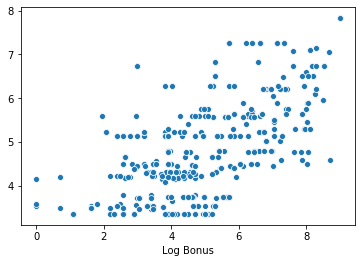

In [501]:
sns.scatterplot(y_train, y_pred)

In [502]:
reg.coef_

inputs.columns

weights_Table = pd.DataFrame(data = reg.coef_, index = inputs.columns, columns = ["Weights"])

array([0.17733477, 1.0224198 ])

Index(['Total Permits', '6 Mo Oil Revenue $'], dtype='object')

In [503]:
weights_Table

,Weights
Total Permits,0.177335
6 Mo Oil Revenue $,1.022420


In [504]:
y_pred_Bonus = np.exp(y_pred)

In [507]:
from sklearn import metrics
results = pd.DataFrame()

results["Bonus"] = np.exp(y_train)

results["Predicted"] = y_pred_Bonus

results["Perc Error"] = ((results["Predicted"] - results["Bonus"])/results["Bonus"]) * 100

In [508]:
results["Perc Error"].apply(lambda x: abs(x)).mean()

207.99551792328552

In [509]:
metrics.mean_absolute_error(y_pred_Bonus, np.exp(y_train))

475.8410390543109

In [513]:
#getting leases within AOI where training data was pulled
leasesInAOI = tractshp[tractshp.within(AOI["geometry"].iloc[0])]

leasesInAOI




In [515]:
leasesInAOI

,SaleParcel,lot_no,tract_id,short_code,label,geometry,centroids,Acres,buffers
16,WY-201Q-014,64921,40,BLMWY-2020-Q1-3,WY-2020-03-6317,"POLYGON ((470775.377 4783849.638, 470775.423 4...",POINT (469958.273 4783844.911),325.0,"POLYGON ((474786.293277905 4783844.910772996, ..."
17,WY-201Q-100,65007,41,BLMWY-2020-Q1-3,WY-2020-03-6318,"POLYGON ((470776.051 4785061.148, 470775.680 4...",POINT (469953.152 4784853.058),166.0,"POLYGON ((474781.1718195324 4784853.058404164,..."
18,WY-201Q-101,65008,42,BLMWY-2020-Q1-3,WY-2020-03-6319,"MULTIPOLYGON (((467495.553 4784235.887, 467083...",POINT (467757.130 4784036.616),494.0,"POLYGON ((472585.150082407 4784036.616042774, ..."
19,WY-201Q-015,64922,45,BLMWY-2020-Q1-3,WY-2020-03-6324,"MULTIPOLYGON (((466663.756 4802008.301, 466664...",POINT (468832.836 4802293.450),1539.0,"POLYGON ((473660.8559083962 4802293.450434712,..."
20,WY-201Q-102,65009,44,BLMWY-2020-Q1-3,WY-2020-03-6322,"POLYGON ((467881.793 4802005.906, 468288.528 4...",POINT (467608.471 4801534.516),243.0,"POLYGON ((472436.491182364 4801534.516088142, ..."
21,WY-201Q-016,64923,49,BLMWY-2020-Q1-3,WY-2020-03-6340,"POLYGON ((468685.657 4801198.094, 468690.476 4...",POINT (468890.677 4801400.067),40.0,"POLYGON ((473718.6974940442 4801400.067115995,..."
22,WY-201Q-017,64924,46,BLMWY-2020-Q1-3,WY-2020-03-6331,"POLYGON ((472330.664 4800025.070, 472329.240 4...",POINT (471858.205 4800294.277),243.0,"POLYGON ((476686.2248892394 4800294.277369834,..."
23,WY-201Q-103,65010,60,BLMWY-2020-Q1-3,WY-2020-03-6401,"POLYGON ((471122.004 4801241.217, 471526.320 4...",POINT (471114.808 4800429.925),325.0,"POLYGON ((475942.8275752033 4800429.924610612,..."
24,WY-201Q-018,64925,47,BLMWY-2020-Q1-3,WY-2020-03-6333,"MULTIPOLYGON (((467066.821 4801197.134, 466662...",POINT (467602.485 4799779.674),243.0,"POLYGON ((472430.5046453754 4799779.674300328,..."
25,WY-201Q-019,64926,51,BLMWY-2020-Q1-3,WY-2020-03-6345,"POLYGON ((465830.368 4798767.101, 465828.995 4...",POINT (465426.427 4798968.315),243.0,"POLYGON ((470254.4470627511 4798968.314839863,..."
